In [4]:
%load_ext autoreload
%autoreload 2
%matplotlib qt

import os
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import json
import time
import logging
import datetime
from datetime import datetime, timedelta
from dateutil.tz import tzlocal, tzutc
import pickle
from anomalyservice import utils

logging.root.setLevel(logging.INFO)

def select_sources(path):
    return [os.path.join(path, f) for f in os.listdir(path) if f.endswith(".data")]

def extract_selection(path, selection):
    selectors = [tuple(x) for x in selection[['server_id', 'metric_id']].values]
    
    first = True
    result = None
    
    for f in select_sources(path):
        logging.info("Reading " + f)
        df = pd.read_pickle(f)
        df = df.loc[:, selectors]
        if first:
            result = df
            first = False
        else:
            result = result.combine_first(df) #will skip duplicate timestamps in new df

    result.sort_index(axis=1, inplace=True)
    return result 

def extract_error_request_data(data_path, metadata):
    metrics = metadata.requests_metrics()
    metrics = metrics[metrics.request_datatype.isin(['RATE', 'ERRORS'])]
    
    selection = pd.merge(metadata.servers_metrics(), metrics, how='inner')    
    return extract_selection(data_path, selection)

def to_metric_id(meta, request_id, datatype):
    metrics = meta.requests_metrics()
    metrics = metrics[metrics.request_id.eq(request_id)]
    metrics = metrics[metrics.request_datatype.eq(datatype)]
    return metrics['metric_id'].iloc[0]

def filter0(df):
    return df.loc[:, df.max() > 0]

def to_request_id(meta, metric_id):
    metrics = meta.requests_metrics()
    cand = metrics[metrics.metric_id.eq(metric_id)]['request_id']
    assert len(cand <= 1)
    if len(cand) == 0:
        raise Exception("Metric %d does not belong to a request" % metric_id)
    return cand.iloc[0]

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
lingala_path = '/home/bart/Documents/data-science/data/lingala'
lingala_meta  = extract.AppMetadata.load(os.path.join(lingala_path, "Lingala-2015-05-19.metadata"))

vrt_path = '/home/bart/Documents/data-science/data/vrt'
vrt_meta  = extract.AppMetadata.load(os.path.join(vrt_path, "VRT-2015-05-18.metadata"))
                                                      
micazu_path = '/home/bart/Documents/data-science/data/micazu'
micazu_meta  = extract.AppMetadata.load(os.path.join(micazu_path, "micazu-2015-05-18.metadata"))                                                      

NameError: name 'extract' is not defined

## Extract

In [130]:
lingala_error_request_data = extract_error_request_data(lingala_path, lingala_meta)
lingala_error_request_data.to_pickle('lingala_error_request_data')

INFO:root:Reading /home/bart/Documents/data-science/data/lingala/Lingala-2015-04-30.data
INFO:root:Reading /home/bart/Documents/data-science/data/lingala/Lingala-2015-05-05.data
INFO:root:Reading /home/bart/Documents/data-science/data/lingala/Lingala-2015-05-18.data
INFO:root:Reading /home/bart/Documents/data-science/data/lingala/Lingala-2015-04-08.data
INFO:root:Reading /home/bart/Documents/data-science/data/lingala/Lingala-2015-04-18.data
INFO:root:Reading /home/bart/Documents/data-science/data/lingala/Lingala-2015-04-20.data
INFO:root:Reading /home/bart/Documents/data-science/data/lingala/Lingala-2015-04-06.data
INFO:root:Reading /home/bart/Documents/data-science/data/lingala/Lingala-2015-05-16.data
INFO:root:Reading /home/bart/Documents/data-science/data/lingala/Lingala-2015-04-17.data
INFO:root:Reading /home/bart/Documents/data-science/data/lingala/Lingala-2015-05-15.data
INFO:root:Reading /home/bart/Documents/data-science/data/lingala/Lingala-2015-04-13.data
INFO:root:Reading /ho

In [132]:
vrt_error_request_data = extract_error_request_data(vrt_path, vrt_meta)
vrt_error_request_data.to_pickle('vrt_error_request_data')

INFO:root:Reading /home/bart/Documents/data-science/data/vrt/VRT-2015-04-24.data
INFO:root:Reading /home/bart/Documents/data-science/data/vrt/VRT-2015-05-06.data
INFO:root:Reading /home/bart/Documents/data-science/data/vrt/VRT-2015-04-09.data
INFO:root:Reading /home/bart/Documents/data-science/data/vrt/VRT-2015-05-09.data
INFO:root:Reading /home/bart/Documents/data-science/data/vrt/VRT-2015-05-10.data
INFO:root:Reading /home/bart/Documents/data-science/data/vrt/VRT-2015-05-03.data
INFO:root:Reading /home/bart/Documents/data-science/data/vrt/VRT-2015-04-12.data
INFO:root:Reading /home/bart/Documents/data-science/data/vrt/VRT-2015-04-29.data
INFO:root:Reading /home/bart/Documents/data-science/data/vrt/VRT-2015-04-28.data
INFO:root:Reading /home/bart/Documents/data-science/data/vrt/VRT-2015-04-07.data
INFO:root:Reading /home/bart/Documents/data-science/data/vrt/VRT-2015-04-23.data
INFO:root:Reading /home/bart/Documents/data-science/data/vrt/VRT-2015-04-21.data
INFO:root:Reading /home/bart

In [131]:
micazu_error_request_data = extract_error_request_data(micazu_path, micazu_meta)
micazu_error_request_data.to_pickle('micazu_error_request_data')

INFO:root:Reading /home/bart/Documents/data-science/data/micazu/micazu-2015-05-15.data
INFO:root:Reading /home/bart/Documents/data-science/data/micazu/micazu-2015-05-07.data
INFO:root:Reading /home/bart/Documents/data-science/data/micazu/micazu-2015-05-03.data
INFO:root:Reading /home/bart/Documents/data-science/data/micazu/micazu-2015-05-11.data
INFO:root:Reading /home/bart/Documents/data-science/data/micazu/micazu-2015-05-10.data
INFO:root:Reading /home/bart/Documents/data-science/data/micazu/micazu-2015-05-16.data
INFO:root:Reading /home/bart/Documents/data-science/data/micazu/micazu-2015-05-17.data
INFO:root:Reading /home/bart/Documents/data-science/data/micazu/micazu-2015-05-14.data
INFO:root:Reading /home/bart/Documents/data-science/data/micazu/micazu-2015-05-13.data
INFO:root:Reading /home/bart/Documents/data-science/data/micazu/micazu-2015-05-06.data
INFO:root:Reading /home/bart/Documents/data-science/data/micazu/micazu-2015-05-05.data
INFO:root:Reading /home/bart/Documents/data

## Load

In [9]:
lingala_error_request_data = pd.read_pickle('lingala_error_request_data')
vrt_error_request_data = pd.read_pickle('vrt_error_request_data')
micazu_error_request_data = pd.read_pickle('micazu_error_request_data')

In [95]:
%matplotlib inline
mpl.rcParams['figure.figsize'] = [20,10]

In [38]:
%matplotlib qt

## Training set

In [5]:
request_rate_tres = 0.2 #(we want at least 12 observations to decide to throw anomalies for errors)

def above_tres(eps):
    def f(arr):
        return np.all(arr > eps)
    return f

def show_errors_requests(meta, data, server_id, request_id):
    fig, axes = plt.subplots(nrows=4, ncols=1)#, sharex=True)
    axes[0].set_title('Error rate')
    axes[1].set_title('Request rate')
    axes[2].set_title('Absolute error rate')
    axes[3].set_title('Error rate avg 1H')
    
    error_id = to_metric_id(meta, request_id, 'ERRORS')
    rate_id = to_metric_id(meta, request_id, 'RATE')
    data.loc[:, [(server_id, error_id)]].plot(ax=axes[0])
    pd.rolling_mean(data.loc[:, [(server_id, error_id)]],60, min_periods=1, center=True).plot(ax=axes[0], color='r')
    data.loc[:, [(server_id, rate_id)]].plot(ax=axes[1])
    data.loc[:, [(server_id, error_id),(server_id, rate_id)]].product(axis=1).plot(ax=axes[2])
    data.loc[:, [(server_id, error_id)]].resample('1H').plot(ax=axes[3])    

In [216]:
vrt_meta.print_request_tree()

634 COSCALE_ROOT
 | 635 vrt.be
 |  | 1024 contentstore.vrt.be
 |  |  | 1014 (token)
 |  |  | 1015 glyph
 |  | 1002 contentstore-stag.vrt.be
 |  |  | 1033 glyph
 |  |  | 1012 (token)
 |  |  |  | 1034 mvc
 |  |  |  |  | 1035 admin
 |  |  |  |  | 1013 v0_0_1
 |  | 636 csclient.vrt.be
 |  |  | 639 client
 |  |  |  | 641 mvc
 |  |  |  |  | 864 config
 |  |  |  |  |  | 846 vrtnieuws
 |  |  |  |  |  | 1023 sporza
 |  |  |  |  | 865 detail
 |  |  |  |  |  | 1032 related
 |  |  |  |  |  | 1017 (token)
 |  |  |  |  |  | 847 vrtnieuws
 |  |  |  |  |  |  | 867 permalink
 |  |  |  |  | 644 admin
 |  |  |  |  | 845 contents
 |  |  |  |  |  | 1016 ?channel=vrtnieuws
 |  |  |  |  |  | 866 tags
 |  |  |  |  |  | 1036 ?channel=sporza
 |  |  |  |  | 1021 apps
 |  |  |  |  |  | 1022 detail
 |  | 637 csclient-stag.vrt.be
 |  |  | 841 json
 |  |  |  | 842 permalink
 |  |  |  |  | 843 (token)
 |  |  | 638 client
 |  |  |  | 640 mvc
 |  |  |  |  | 642 contents
 |  |  |  |  |  | 649 ?channel=sporza
 |  |  |  |

In [334]:
vrt_meta.servers()

description   id           name         source  \
id                                                                             
261   Created by agent for 'cubapfestag1'  261   cubapfestag1  CoScale Agent   
262   Created by agent for 'cubapfestag2'  262   cubapfestag2  CoScale Agent   
263   Created by agent for 'cubapbestag2'  263   cubapbestag2  CoScale Agent   
264   Created by agent for 'cubapbestag1'  264   cubapbestag1  CoScale Agent   
301   Created by agent for 'cubapfeprod1'  301   cubapfeprod1  CoScale Agent   
302   Created by agent for 'cubapfeprod4'  302   cubapfeprod4  CoScale Agent   
303   Created by agent for 'cubapbeprod1'  303   cubapbeprod1  CoScale Agent   
304   Created by agent for 'cubapbeprod2'  304   cubapbeprod2  CoScale Agent   
305       Created by agent for 'webstag1'  305       webstag1  CoScale Agent   
321   Created by agent for 'cubapfeprod2'  321   cubapfeprod2  CoScale Agent   
322   Created by agent for 'cubapfeprod3'  322   cubapfeprod3  CoScale Agent   
441  Created by agent for 'cubmongostag1'  441  cubmongostag1  CoScale Agent   

        state type  version  
id                           
261   ENABLED             2  
262   ENABLED             2  
263   ENABLED             2  
264   ENABLED             2  
301   ENABLED             2  
302   ENABLED             2  
303   ENABLED             2  
304   ENABLED             2  
305  DISABLED             3  
321   ENABLED             2  
322   ENABLED             2  
441   ENABLED             2

In [143]:
vrt_training = [(261, 1036), (264, 634), (302, 865), (322, 846)]

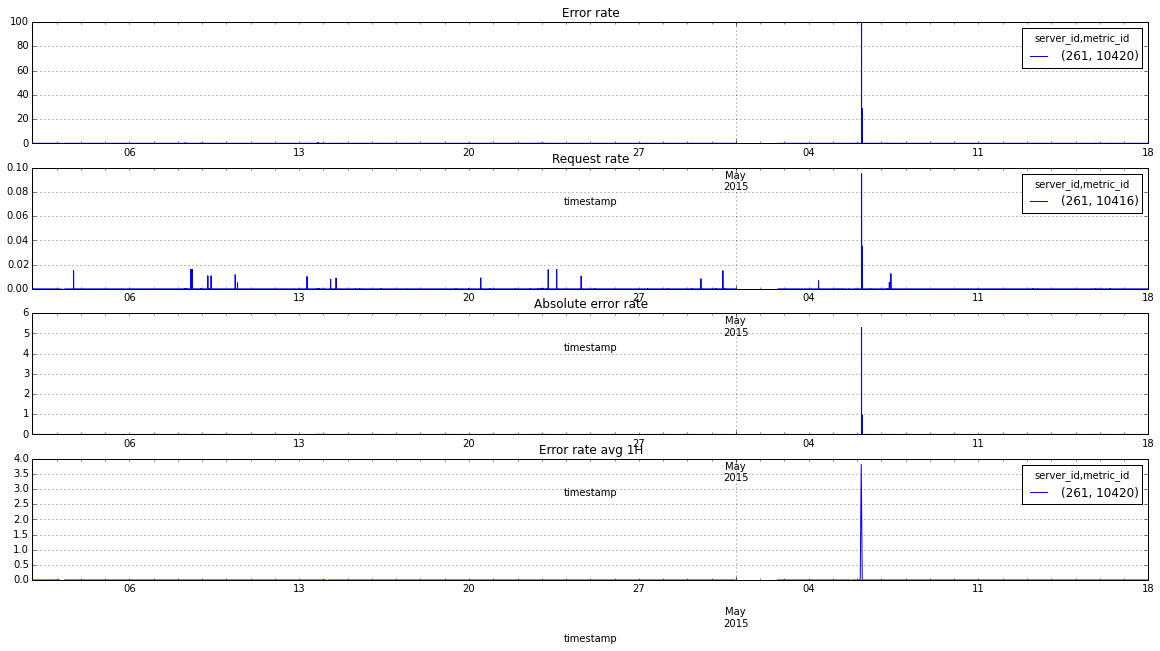

In [212]:
show_errors_requests(vrt_meta, vrt_error_request_data, 261, 1036)

Request rates are very low here -> unreliable error rate. The only anomaly we might be reporting here is that we see a spike in the request rate. Nothing more

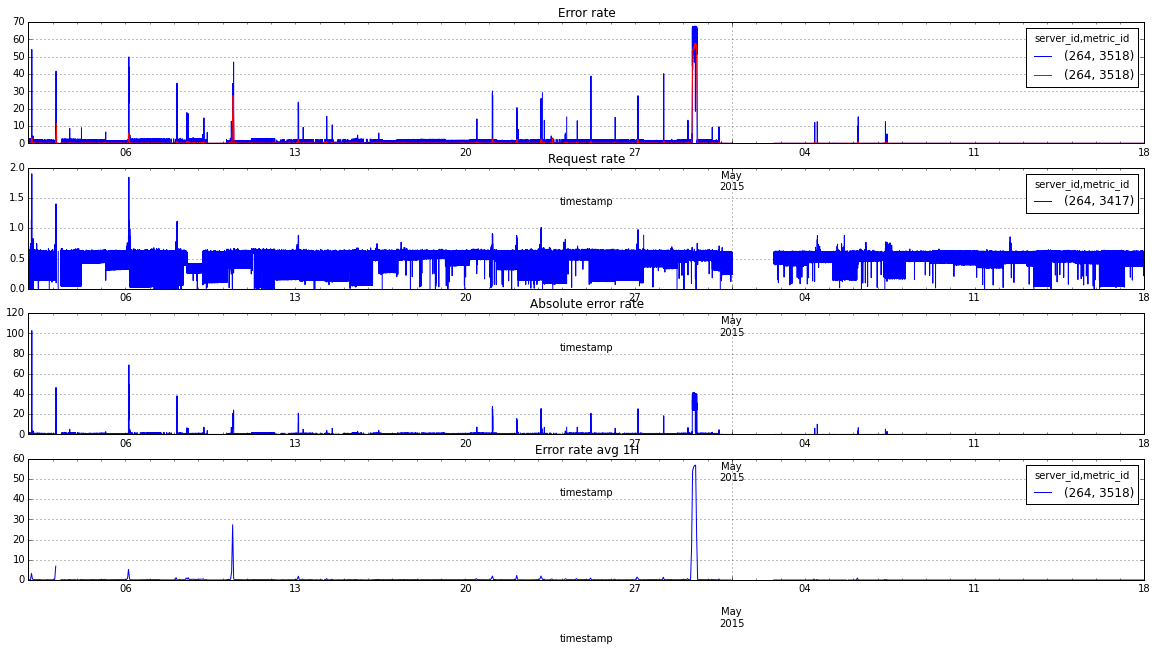

In [242]:
show_errors_requests(vrt_meta, vrt_error_request_data, 264, 634)

At least last big spike at the end of april has no correlation with changing request rates so should be caught. Also spike on the 6th of april coincides with an increase in request rate so should be caught, or at least increase in request rate should be caught. OTOH that one lies within the training window what we consider 'normal'.

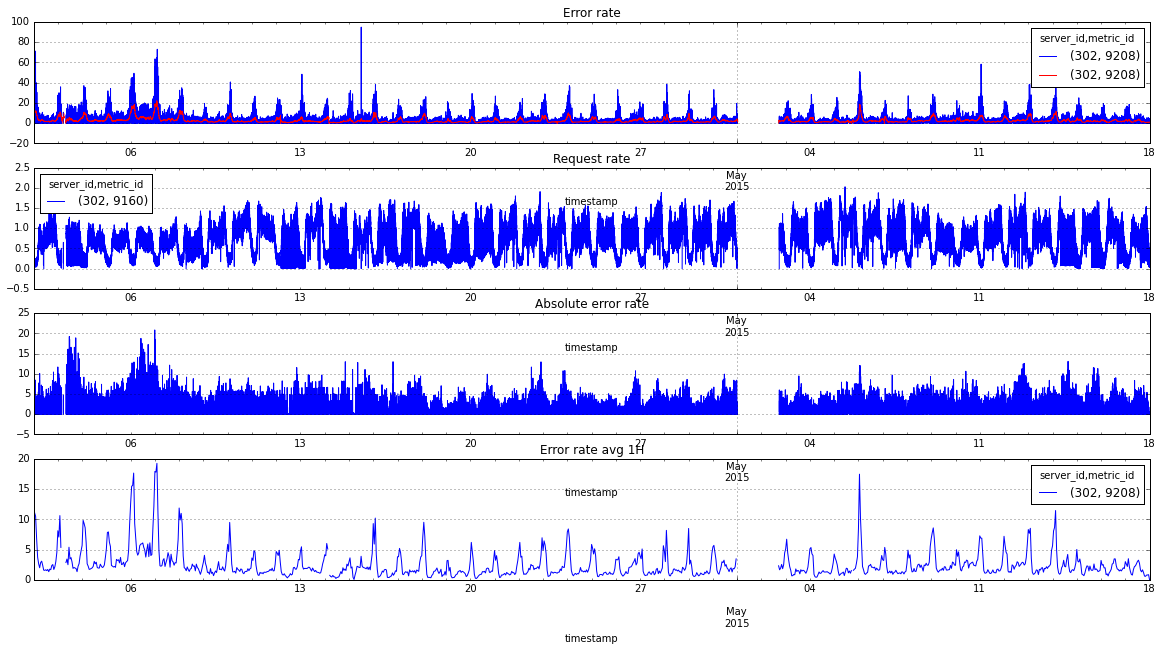

In [243]:
show_errors_requests(vrt_meta, vrt_error_request_data, 302, 865)

In this case the peek on the 15th of april coincides with a drop to 0 in request rate at that point: see zoom in below. Moreover all higher error peaks correspond to lower request rates.

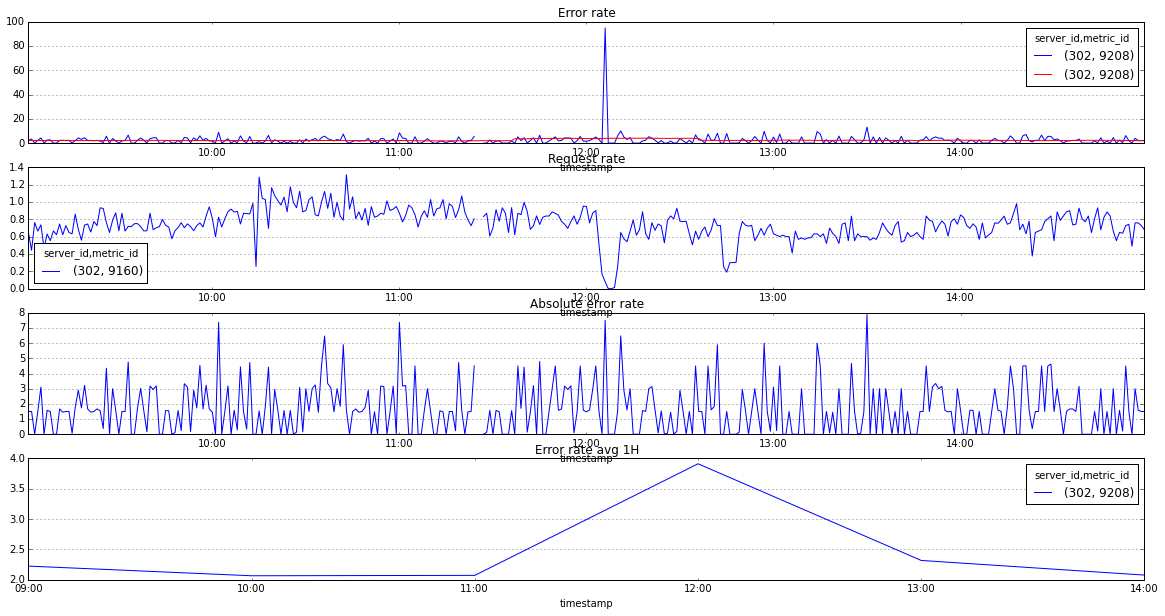

In [248]:
tmp = vrt_error_request_data
tmp = tmp.loc[tmp.index > "2015-04-15 09:00"]
tmp = tmp.loc[tmp.index < "2015-04-15 15:00"]
show_errors_requests(vrt_meta, tmp, 302, 865)

Ok, so we only need to look at error rate behavior if the request rate is above some threshold, otherwise we're just chasing ghosts. So we require a lower limit on request rate such that the number of requests seen by the agent is at least 12: rate = 12 / 60 = 0.2 and this for the minute before, at and after the error.

Even more in general, to investigate an error time series in general, we require that the average request rate is also above some threshold, otherwise we cannot reliably estimate the 'normal' behavior for the errors.

A simple cutoff in request rate generates quite some artefacts however, we need to make sure the remedy is no worse than the curse.

##Filtered

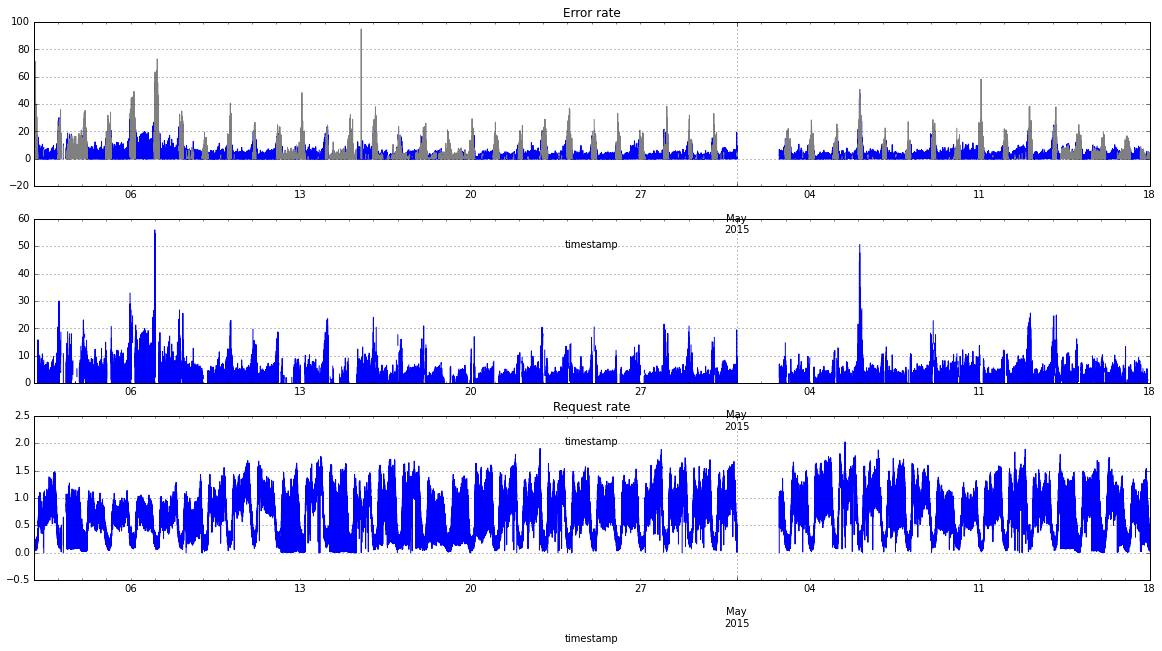

In [328]:
fig, axes = plt.subplots(nrows=3, ncols=1)
error_axis = axes[0]
filter_axis = axes[1]
rate_axis = axes[2]

error_axis.set_title('Error rate')
rate_axis.set_title('Request rate')

server_id = 302
request_id = 865
meta = vrt_meta

error_id = to_metric_id(meta, request_id, 'ERRORS')
rate_id = to_metric_id(meta, request_id, 'RATE')

data = vrt_error_request_data
data = data.loc[:, [(server_id, error_id),(server_id, rate_id)]]
data.columns = ['errors', 'rate']
valid = pd.rolling_apply(data.loc[:, 'rate'], window=3, func=above_tres(0.2))
data['valid'] = np.where(valid, data['errors'], np.NAN)
data['invalid'] = np.where(valid, np.NAN, data['errors'])

data['valid'].plot(ax=error_axis, color='Blue')
data['invalid'].plot(ax=error_axis, color='Grey')

data['valid'].plot(ax=filter_axis, color='Blue')

data['rate'].plot(ax=rate_axis)

A simple cutoff in request rate generates quite some artefacts however (see above), we need to make sure the remedy is no worse than the curse.

##Scatter plot

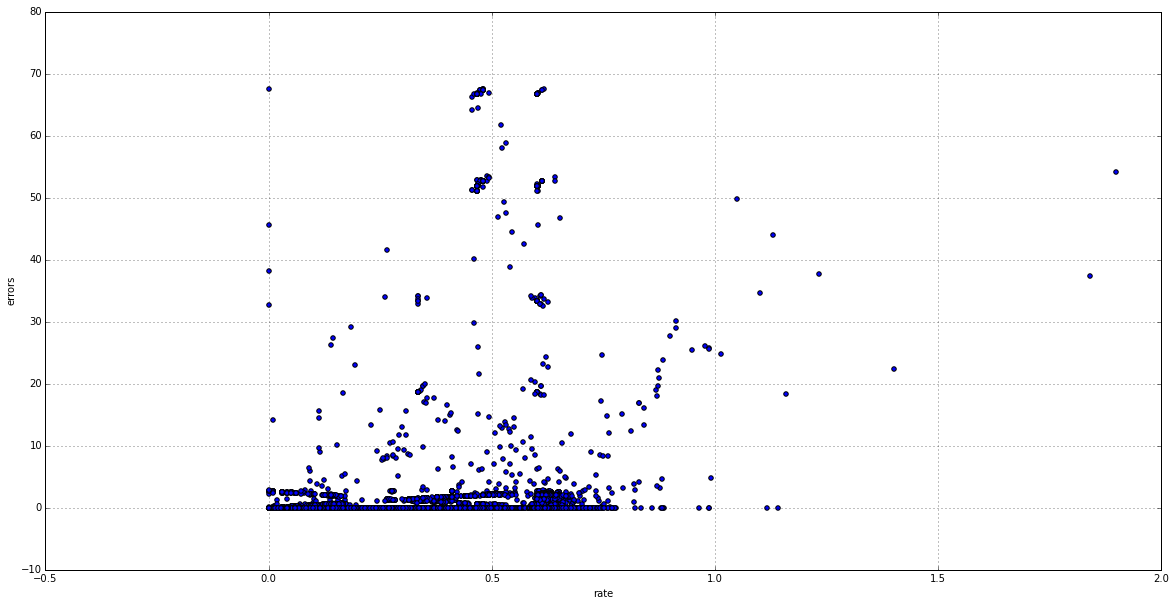

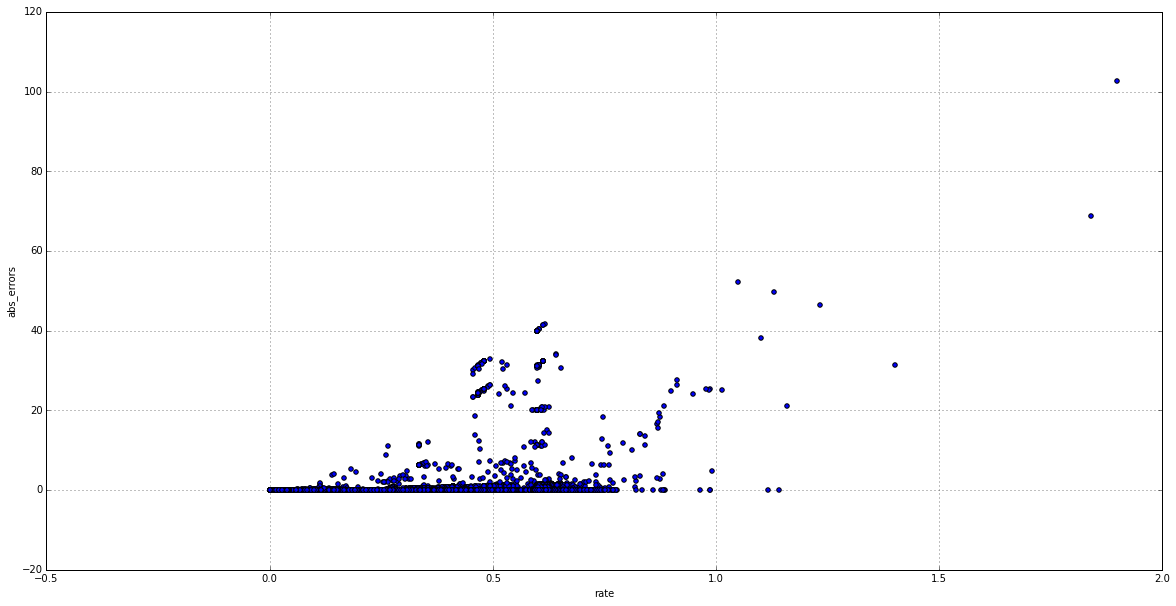

In [332]:
server_id, request_id = 264, 634
meta = vrt_meta

error_id = to_metric_id(meta, request_id, 'ERRORS')
rate_id = to_metric_id(meta, request_id, 'RATE')

data = vrt_error_request_data
data = data.loc[:, [(server_id, error_id),(server_id, rate_id)]]
data.columns = ['errors', 'rate']

data['abs_errors'] = data.product(axis=1)

data.plot(kind='scatter', x='rate', y='errors')
data.plot(kind='scatter', x='rate', y='abs_errors')

Except from some spikes in request rate this does not look like a promising representation to spot anomalies. 

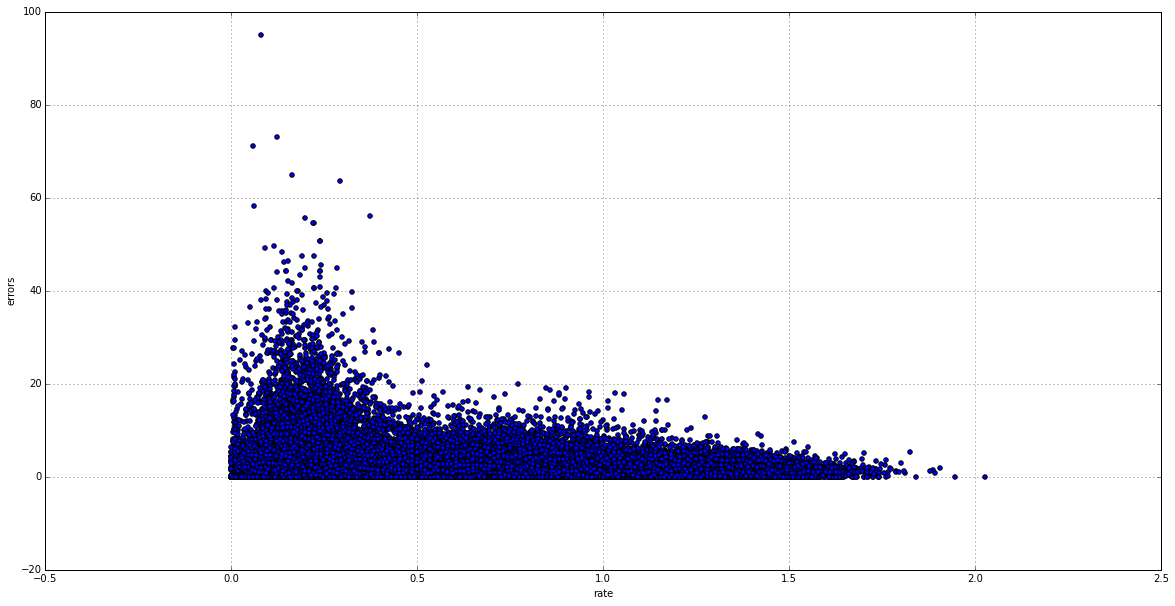

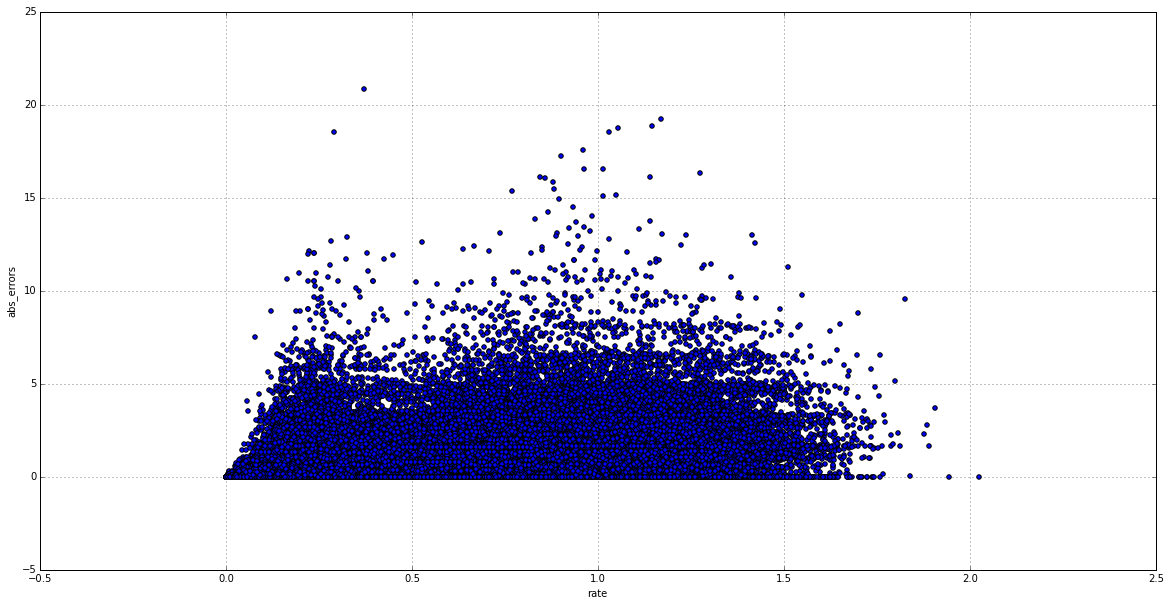

In [333]:
server_id, request_id = 302, 865
meta = vrt_meta

error_id = to_metric_id(meta, request_id, 'ERRORS')
rate_id = to_metric_id(meta, request_id, 'RATE')

data = vrt_error_request_data
data = data.loc[:, [(server_id, error_id),(server_id, rate_id)]]
data.columns = ['errors', 'rate']

data['abs_errors'] = data.product(axis=1)

data.plot(kind='scatter', x='rate', y='errors')
data.plot(kind='scatter', x='rate', y='abs_errors')

Same here. Removing the time dimension here does not seem to be a very good idea -> not much information is left to decide clearly which points are anomalous and which not.

Now with aggragated data

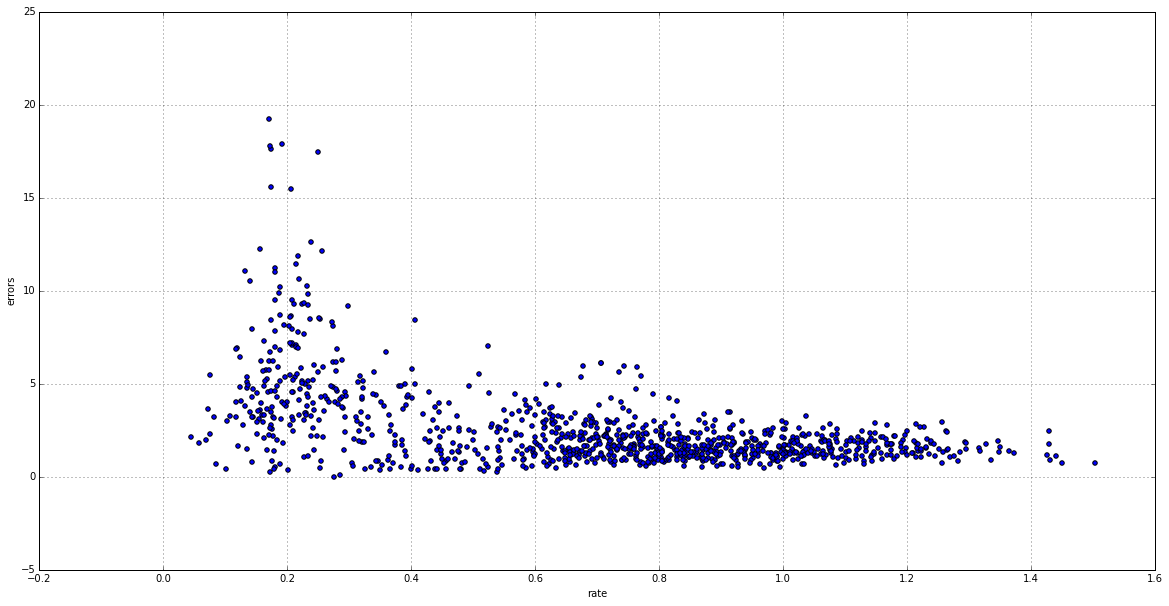

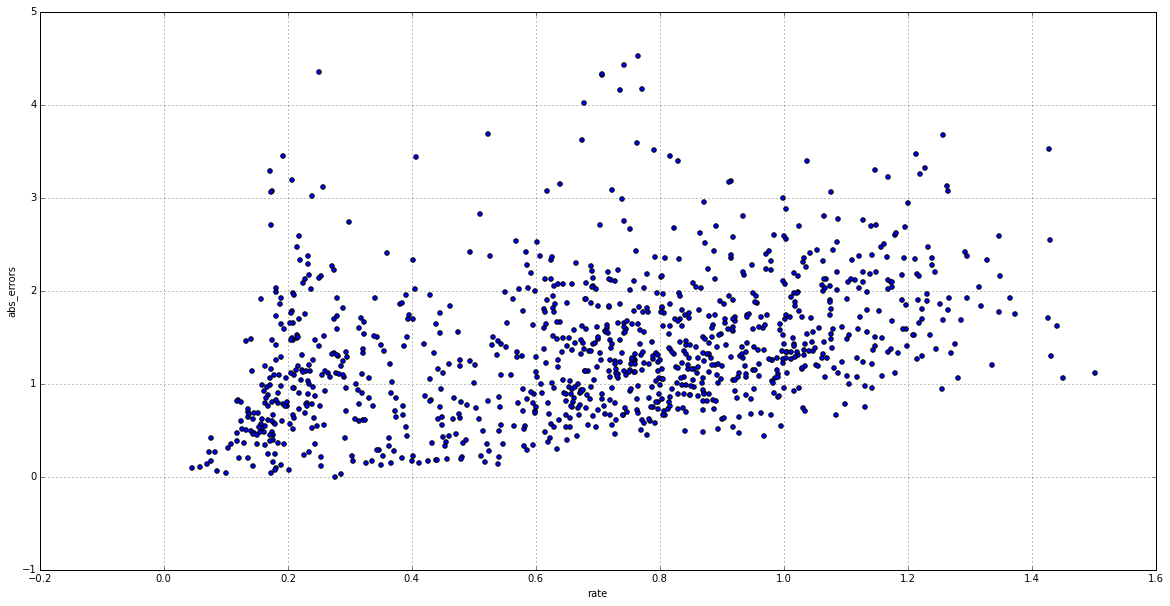

In [179]:
server_id, request_id = 302, 865
meta = vrt_meta

error_id = to_metric_id(meta, request_id, 'ERRORS')
rate_id = to_metric_id(meta, request_id, 'RATE')

data = vrt_error_request_data
data = data.loc[:, [(server_id, error_id),(server_id, rate_id)]]
data.columns = ['errors', 'rate']

data = data.resample('1H')

data['abs_errors'] = data.product(axis=1)

data.plot(kind='scatter', x='rate', y='errors')
data.plot(kind='scatter', x='rate', y='abs_errors')

##Training set 2nd try

In [6]:
def set_anoms(series, ranges):
    for start, stop in ranges:
        selection = series.index
        selection = selection[selection > start]
        selection = selection[selection < stop]
        series[selection] = 1
    return series

def create_training_set(meta, data, server_id, request_id, anomaly_periods):
    error_id = to_metric_id(meta, request_id, 'ERRORS')
    rate_id = to_metric_id(meta, request_id, 'RATE')
    df = data.loc[:, [(server_id, error_id),(server_id, rate_id)]]
    df.columns = ['errors', 'rate']
    anomalies = pd.Series(0, index=df.index)
    anomalies = set_anoms(anomalies, anomaly_periods)
    df['anomalies'] = anomalies
    return df

def inspect_training_set(training_set):
    fig, [ax_error, ax_error_avg, ax_rate, ax_anoms] = plt.subplots(nrows=4, ncols=1)
    ax_error.set_title('Error rate')
    ax_error_avg.set_title('Error rate smoothened')
    ax_rate.set_title('Request rate')
    ax_anoms.set_title('Defined anomalies')

    training_set['errors'].plot(ax=ax_error, color='Blue')
    training_set['rate'].plot(ax=ax_rate)
    training_set['anomalies'].plot(ax=ax_anoms,kind='area', color='Red')
    
#     pd.rolling_mean(training_set['errors'], window=60, min_periods=1, center=True).plot(ax=ax_error, color='Red')
    training_set['errors'].resample('1H').plot(ax=ax_error_avg)    
    
#     data.loc[:, [(server_id, rate_id)]].plot(ax=axes[1])
#     data.loc[:, [(server_id, error_id),(server_id, rate_id)]].product(axis=1).plot(ax=axes[2])
#     data.loc[:, [(server_id, error_id)]].resample('1H').plot(ax=axes[3])    

In [86]:
%matplotlib inline
mpl.rcParams['figure.figsize'] = [20,10]

In [530]:
%matplotlib qt

### Vrt1

In [9]:
vrt1 = create_training_set(vrt_meta, vrt_error_request_data, 264, 634,
                            [("2015-04-29 08:40","2015-04-29 13:30"),
                             ("2015-04-10 09:50","2015-04-10 11:00")])

In [517]:
vrt1.plot(subplots=True, sharex=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fdea411ef90>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7fdea40a9610>], dtype=object)

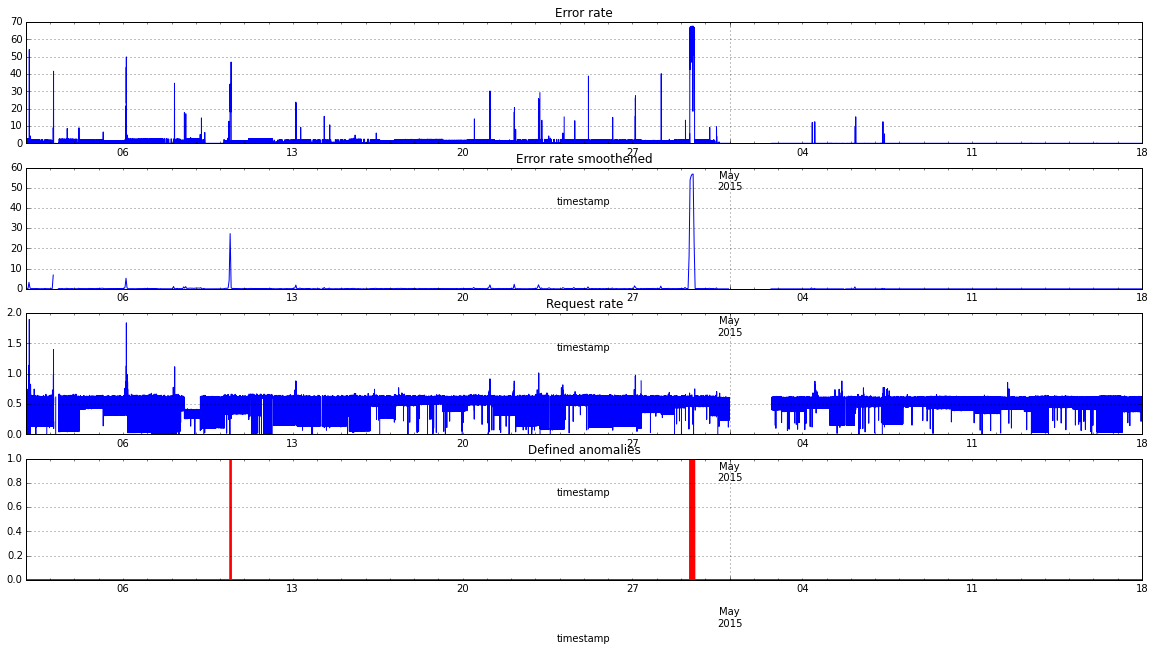

In [485]:
inspect_training_set(vrt1)

Same data as above, just to put training data together. The two peaks: one at 10 april and one on the 19th are anomalies, not caused by too low request rates.

### Vrt 2

In [10]:
vrt2 = create_training_set(vrt_meta, vrt_error_request_data, 261, 637,
                          [("2015-05-04 13:00", "2015-05-10")])

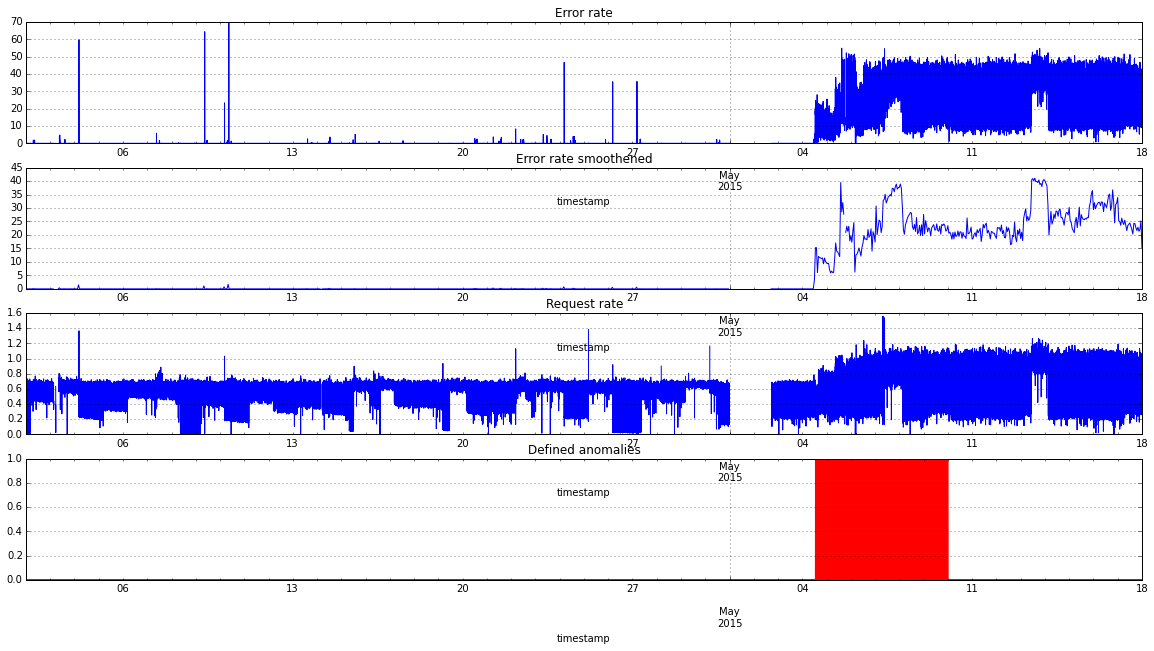

In [494]:
inspect_training_set(vrt2)

Here the steady rising of the error rate is an anomaly, at least initially

### Vrt 3

In [11]:
vrt3 = create_training_set(vrt_meta, vrt_error_request_data, 304, 1024,
                          [("2015-05-06 03:48", "2015-05-06 03:54"),
                           ("2015-05-06 04:19", "2015-05-06 04:24")])

In [511]:
vrt3.plot(subplots=True, sharex=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fdeb0339950>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7fdeb0ac2e10>], dtype=object)

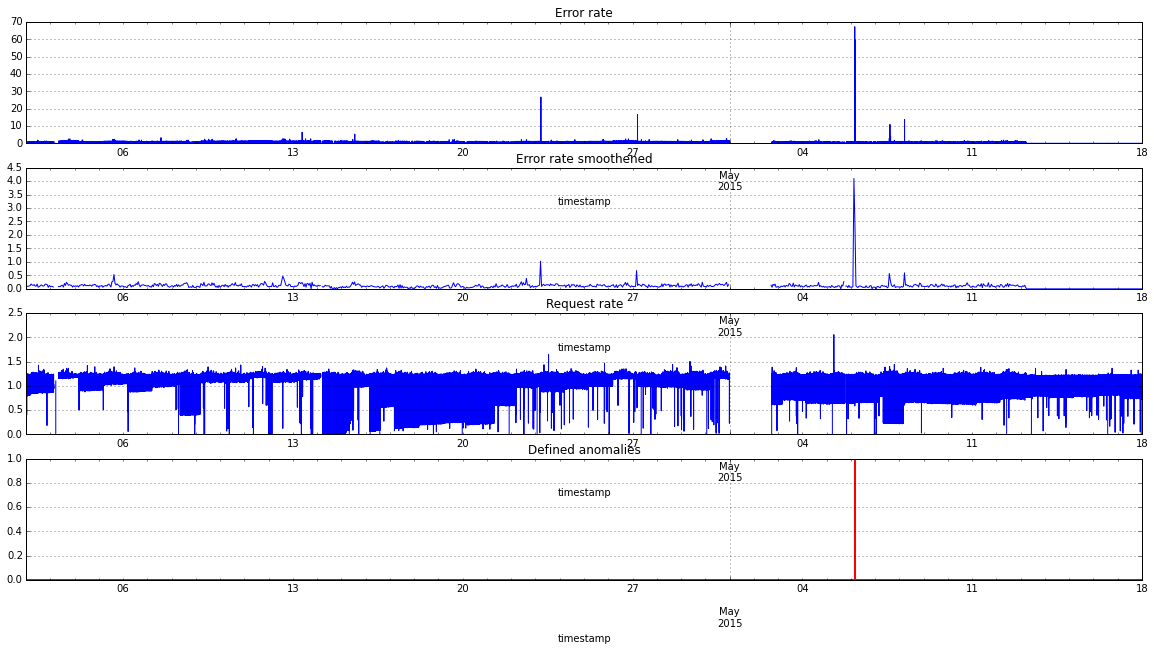

In [514]:
inspect_training_set(vrt3)

Peek on the 6th of may, not caused by drop in request rate

### Micazu 1

In [12]:
micazu1 = create_training_set(micazu_meta, micazu_error_request_data, 230, 888, [])

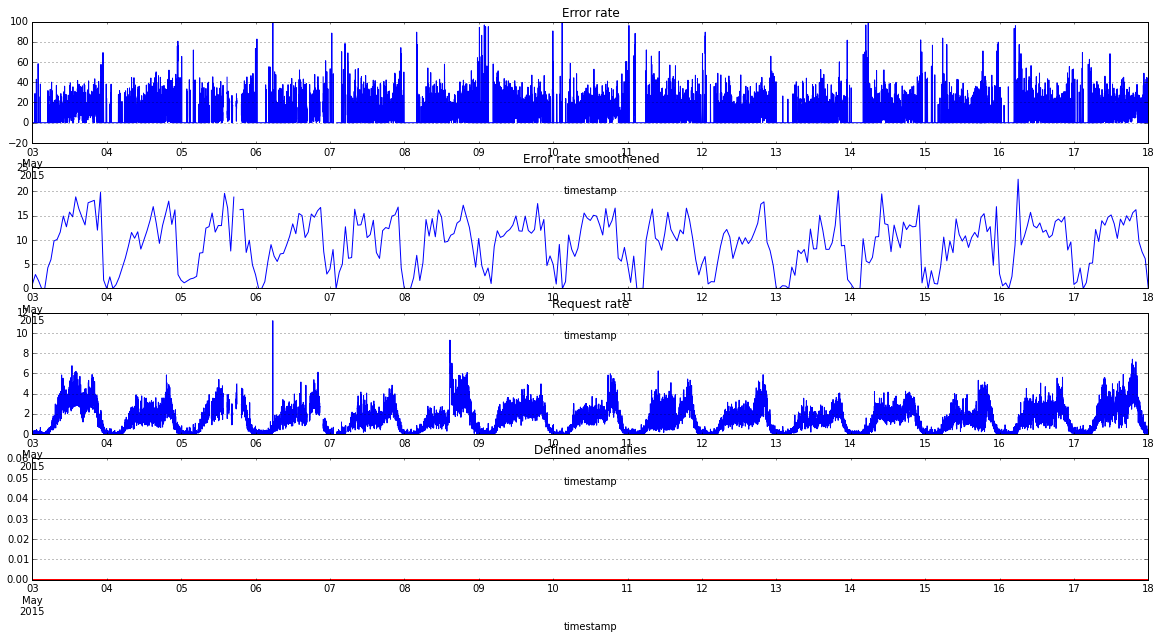

In [526]:
inspect_training_set(micazu1)

Peek showing up in CoScale does not show up in these graphs -> they are an artefact of missing data: the error rate  graph at 60s interval is spiky, if a range of lower values is missing, it will preserve the spike longer in higher rollup intervals. So this data series is not immediately usable.

###Micazu 2

In [13]:
micazu2 = create_training_set(micazu_meta, micazu_error_request_data, 230, 891, 
                              [("2015-05-14 00:40","2015-05-14 02:56")])

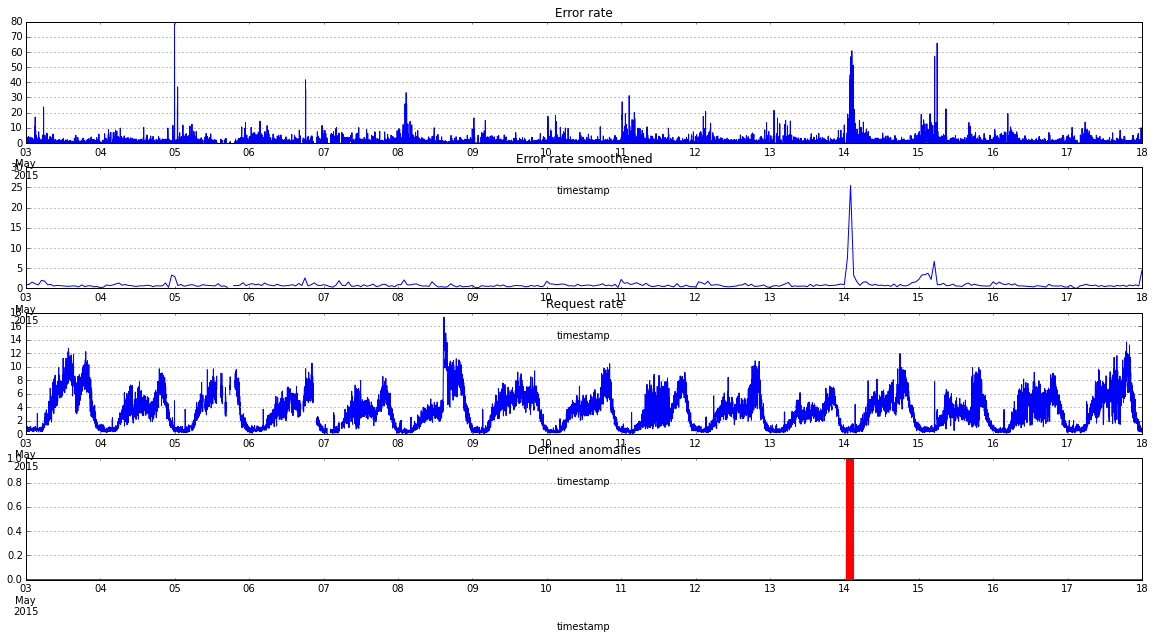

In [541]:
inspect_training_set(micazu2)

##Collection

In [16]:
training_set = [vrt1, vrt2, vrt3, micazu2]

In [14]:
def inspect_training_set(training_set):
    fig, [ax_error, ax_error_avg, ax_rate, ax_anoms] = plt.subplots(nrows=4, ncols=1)
    ax_error.set_title('Error rate')
    ax_error_avg.set_title('Error rate smoothened')
    ax_rate.set_title('Request rate')
    ax_anoms.set_title('Defined anomalies')

    training_set['errors'].plot(ax=ax_error, color='Blue')
    training_set['rate'].plot(ax=ax_rate)
    training_set['anomalies'].plot(ax=ax_anoms,kind='area', color='Red')
    
#     pd.rolling_mean(training_set['errors'], window=60, min_periods=1, center=True).plot(ax=ax_error, color='Red')
    training_set['errors'].resample('1H').plot(ax=ax_error_avg)    
    
#     data.loc[:, [(server_id, rate_id)]].plot(ax=axes[1])
#     data.loc[:, [(server_id, error_id),(server_id, rate_id)]].product(axis=1).plot(ax=axes[2])
#     data.loc[:, [(server_id, error_id)]].resample('1H').plot(ax=axes[3])    

In [15]:
def anomaly_regions(anomaly_scores):
    return np.diff(anomaly_scores).tolist().count(1)

In [16]:
def evaluate_detector(training_set, detector):
    anomaly_scores = detector(training_set)

    fig, [ax_error, ax_error_avg, ax_rate, ax_anoms, ax_anoms_detect] = plt.subplots(nrows=5, ncols=1)
    ax_error.set_title('Error rate')
    ax_error_avg.set_title('Error rate smoothened')
    ax_rate.set_title('Request rate')
    ax_anoms.set_title('Defined anomalies')
    ax_anoms_detect.set_title('Detected anomalies')
    
    training_set['errors'].plot(ax=ax_error, color='Blue')
    training_set['errors'].resample('1H').plot(ax=ax_error_avg)
    training_set['rate'].plot(ax=ax_rate)
    training_set['anomalies'].plot(ax=ax_anoms,kind='area', color='Red')

    regions = anomaly_regions(anomaly_scores)
    anomaly_scores.plot(ax = ax_anoms_detect, kind='area', color='Pink', title='ANomalies, regions = %d' % regions)

In [17]:
def ksigma(k, window, min_periods, series):
    mean = pd.rolling_mean(series, window, min_periods=min_periods)
    std = pd.rolling_std(series, window, min_periods=min_periods)
    return pd.Series(np.where(abs(series - mean) > k * std, 1, 0), index=series.index) 

In [18]:
import functools
def compose(f, g):
    return lambda x: f(g(x))

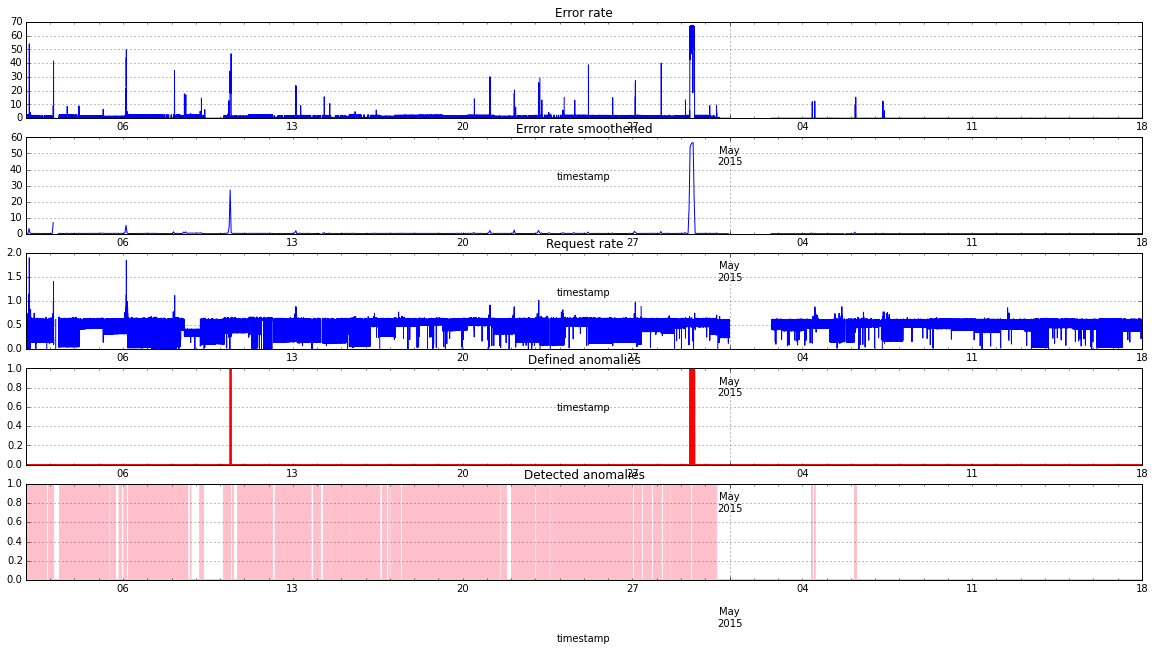

In [69]:
evaluate_detector(vrt1, compose(functools.partial(ksigma, 3, 60, None), lambda df: df['errors']))

Useless as such

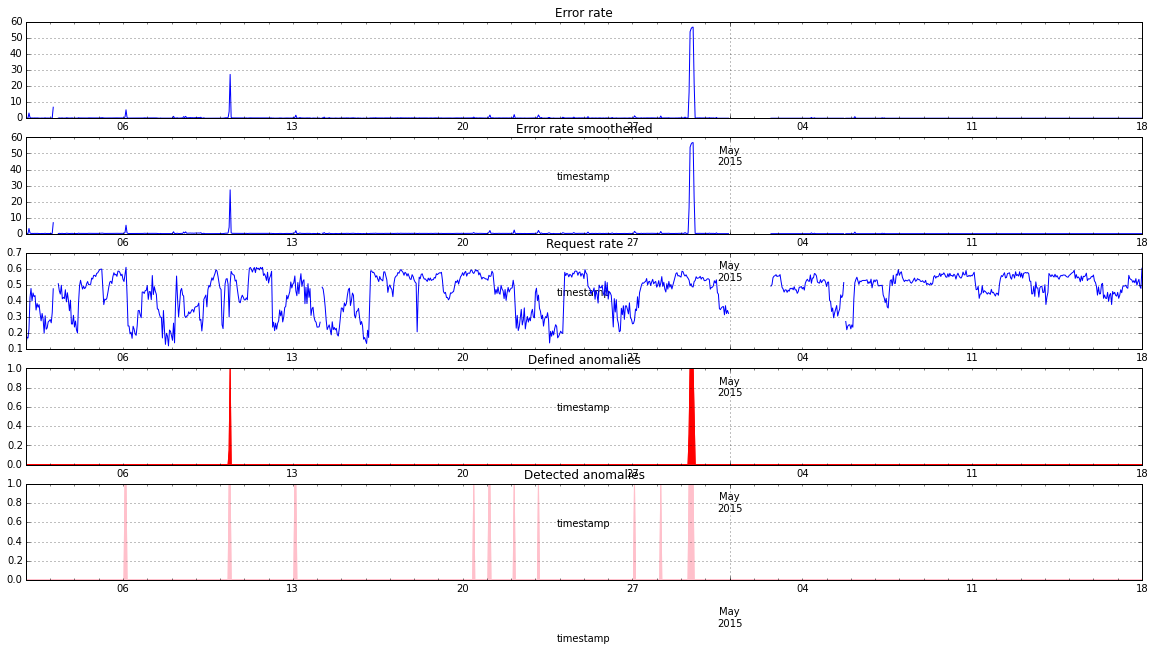

In [70]:
evaluate_detector(vrt1.resample('1H'), compose(functools.partial(ksigma, 3, 60, None), lambda df: df['errors']))

Still simple 3-sigma, but already looking much better.

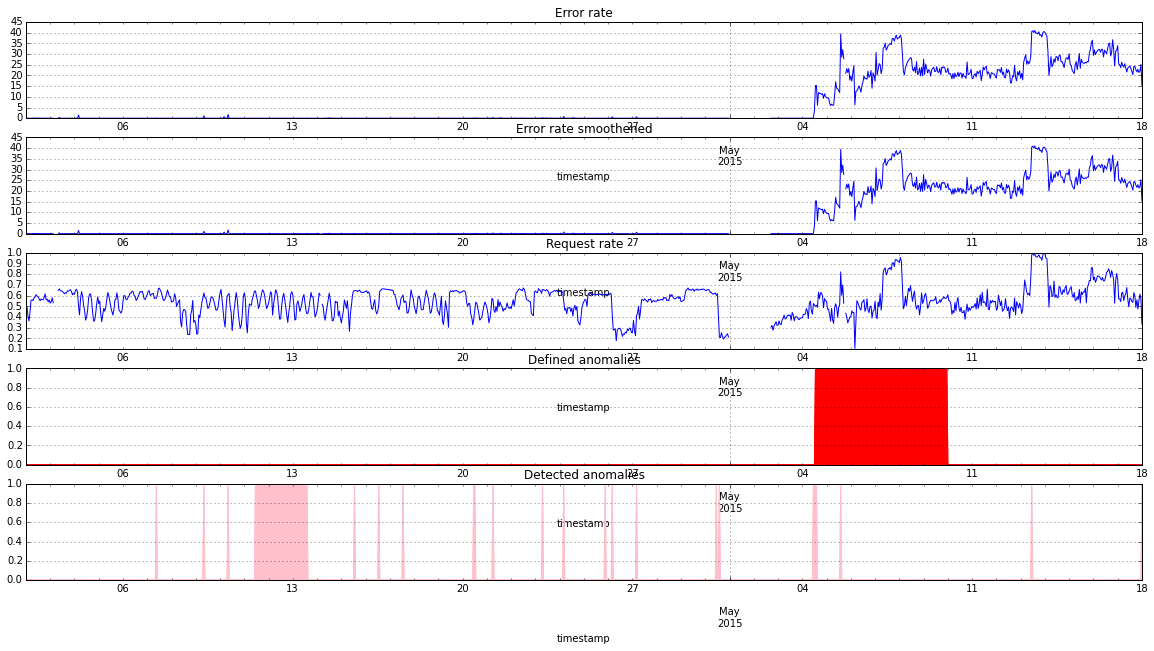

In [80]:
evaluate_detector(vrt2.resample('1H'), compose(functools.partial(ksigma, 3, 24, None), lambda df: df['errors']))

At least the start of the upward region is detected

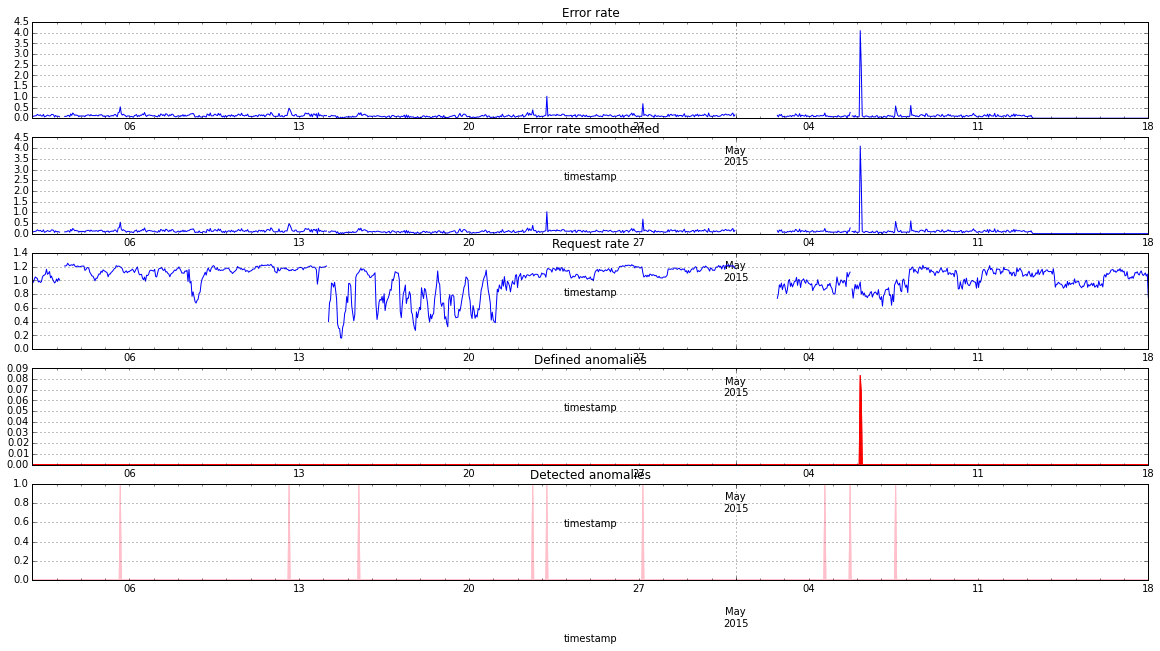

In [77]:
evaluate_detector(vrt3.resample('1H'), compose(functools.partial(ksigma, 3, 20, None), lambda df: df['errors']))

The highest peek in error rate is not detected here due to missing data => no moving average and std's are defined at that point.

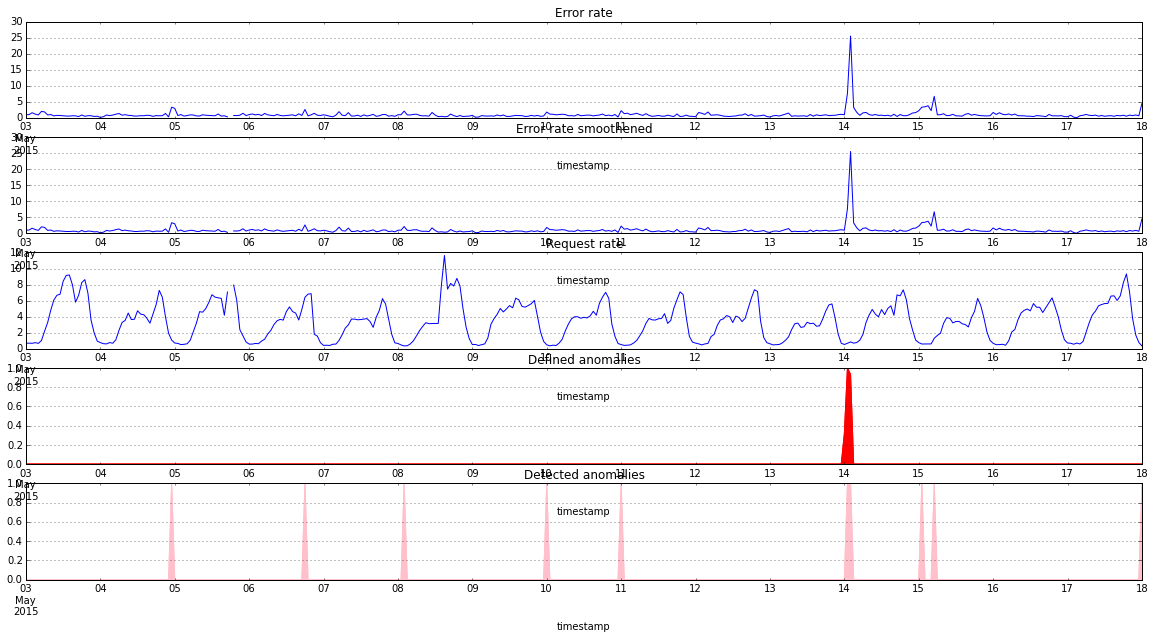

In [87]:
evaluate_detector(micazu2.resample('1H'), compose(functools.partial(ksigma, 3, 20, None), lambda df: df['errors']))

At least peak is detected, maybe some more false positives, maybe not.

Ok let's now make the aggregation part of the detector, not of the preprocessor. Try to switch to percentiles and use a 'budget-driven' approach.

In [19]:
def dunning(resample, quant, window, min_periods, df):
    """
    anom_period: period between two reported anomalies, in minutes, statistically. Together with the 
    frequency of the timeseries, influences the quantile chosen.
    """
    data = df['errors'].resample(resample)
    upper = pd.rolling_quantile(data, window=window, quantile=quant, min_periods=min_periods)
    return pd.Series(np.where(data > upper, 1, 0), index=data.index)

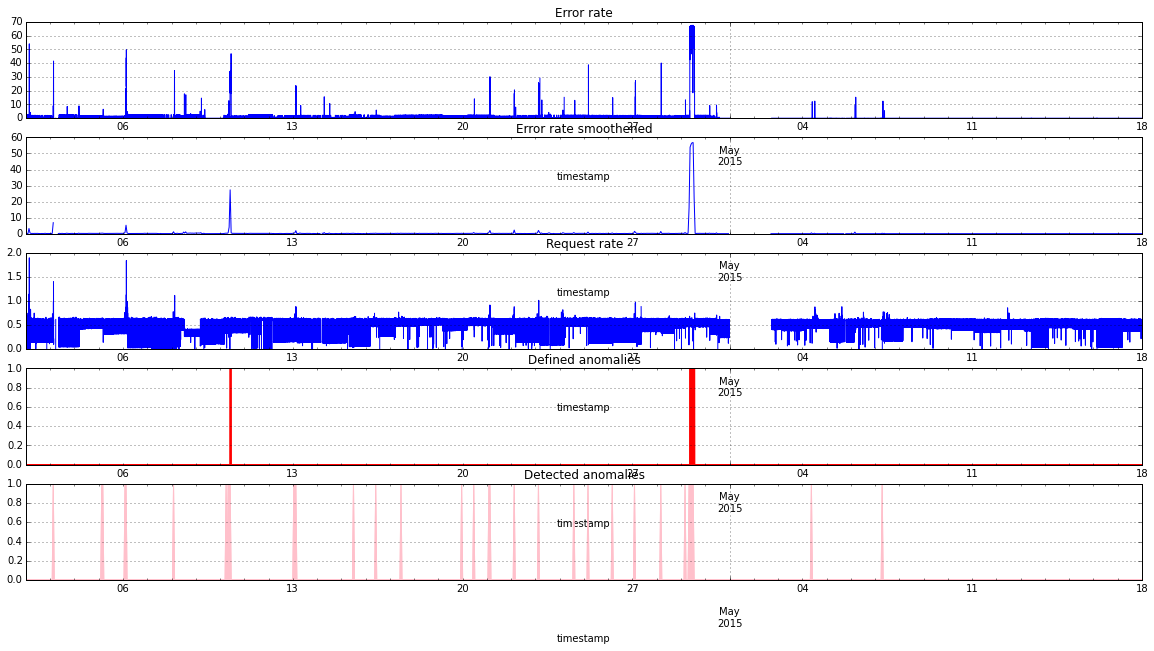

In [119]:
evaluate_detector(vrt1, functools.partial(dunning, '1H', 0.99, 24, None))

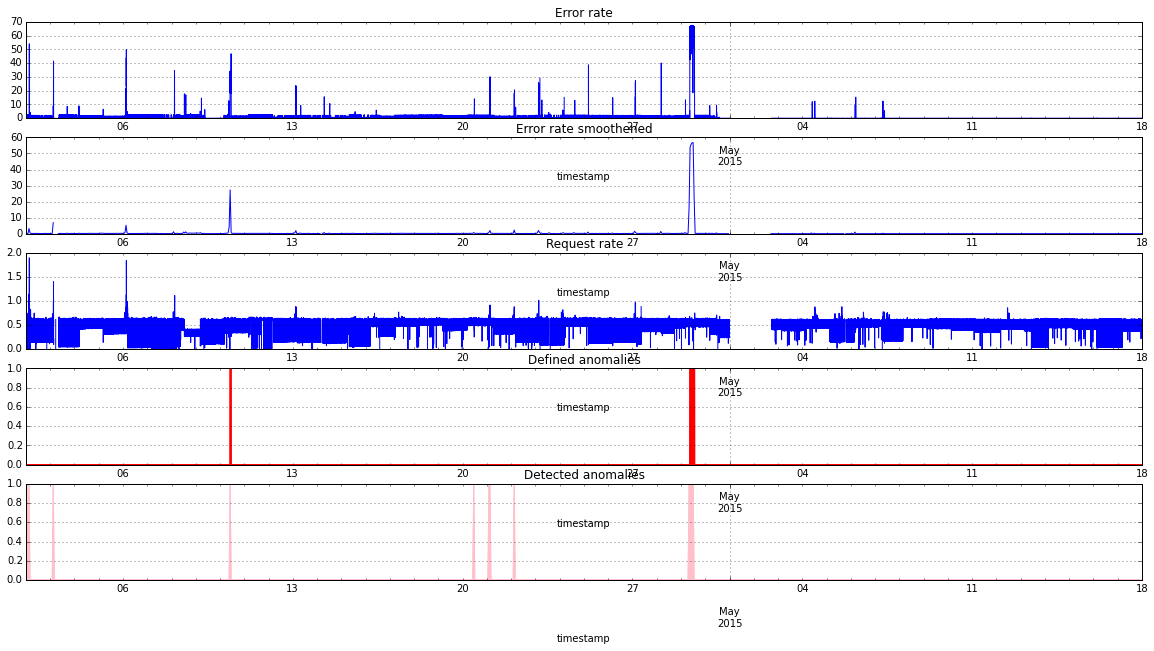

In [123]:
evaluate_detector(vrt1, functools.partial(dunning, '1H', 0.9999, 24 * 7, 1))

This starts to work somehow

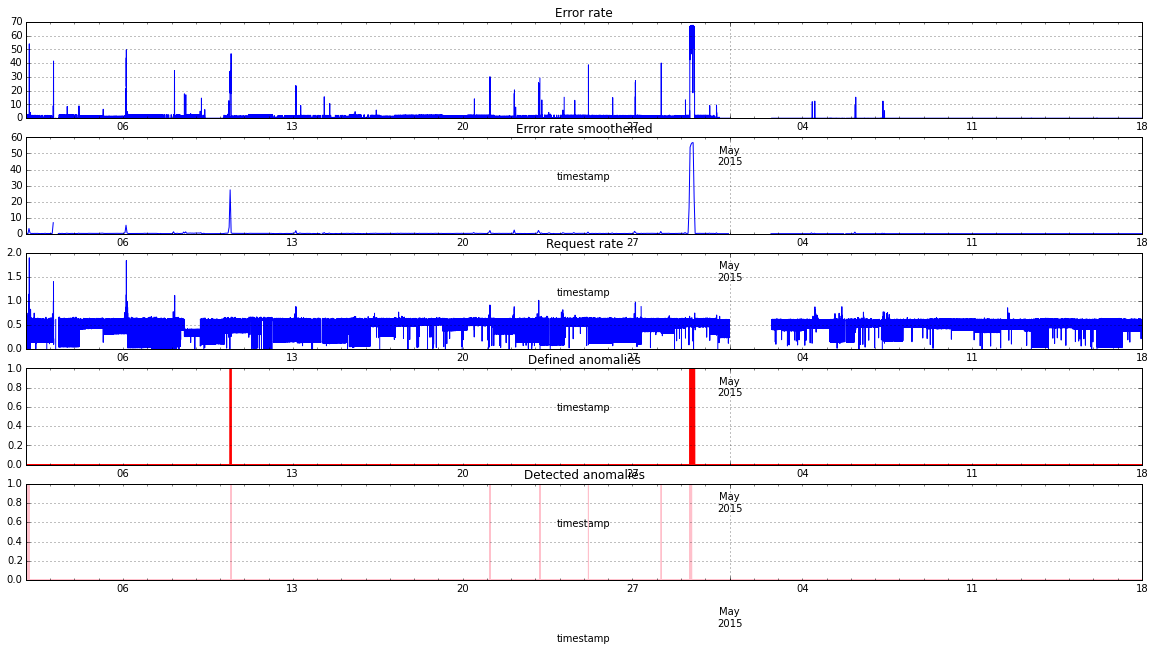

In [124]:
evaluate_detector(vrt1, functools.partial(dunning, '1T', 0.9999, 60 * 24 * 7, 10))

Seems also to work directly on 1 minute data, let's first check  the others.

1H
1T
1H
1T
1H
1T


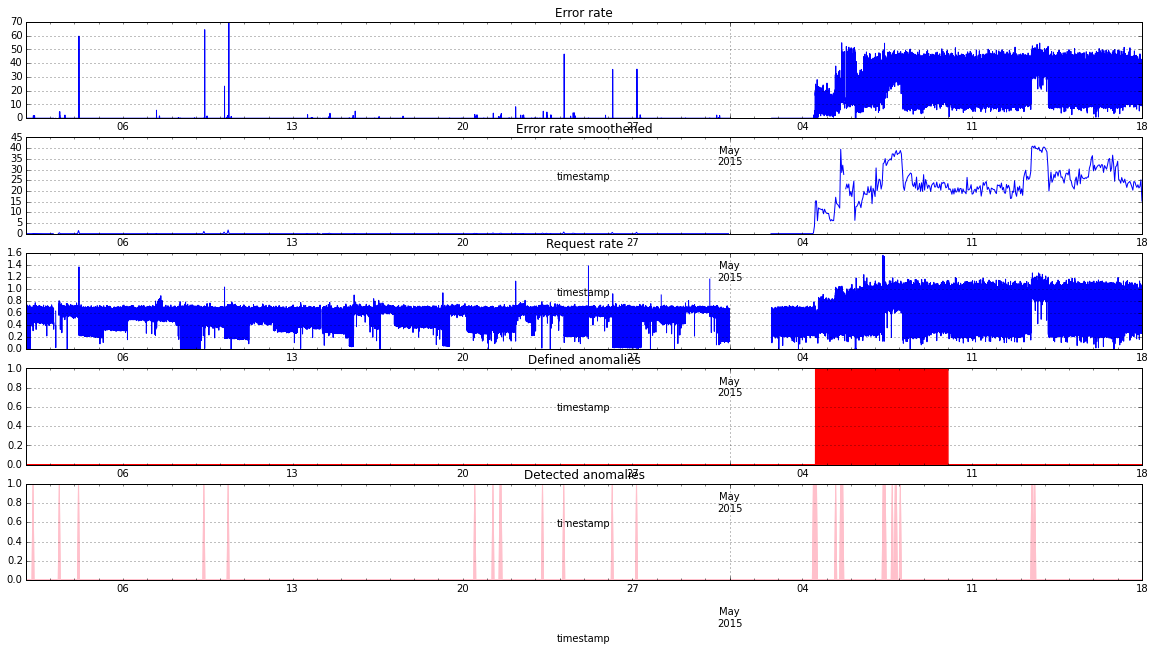

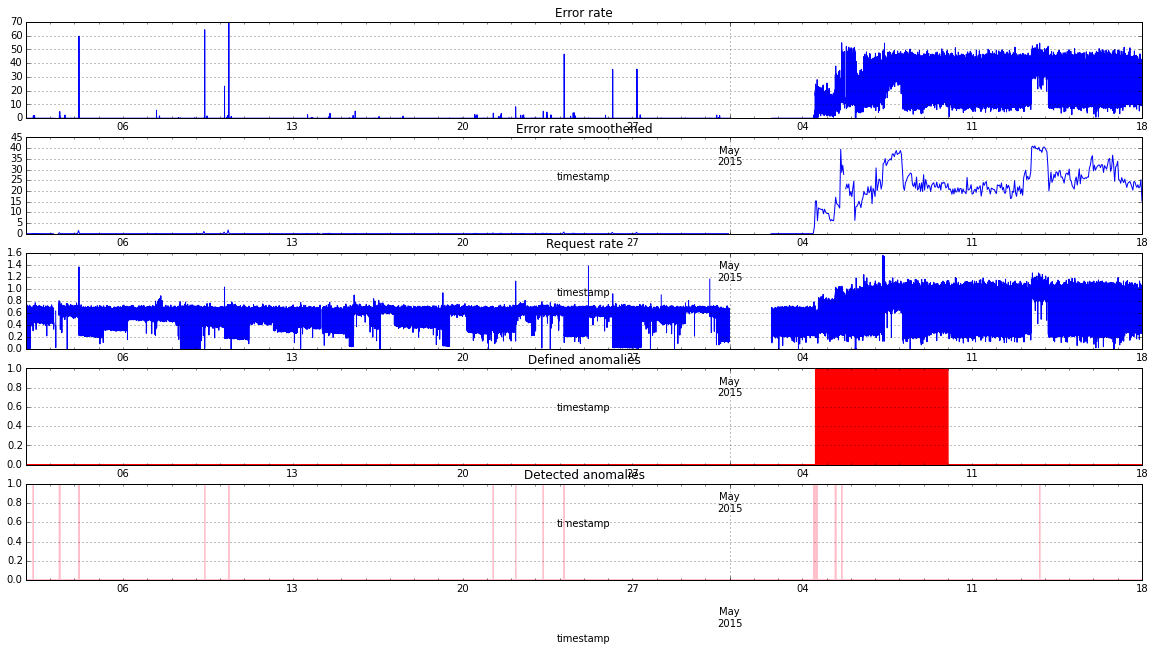

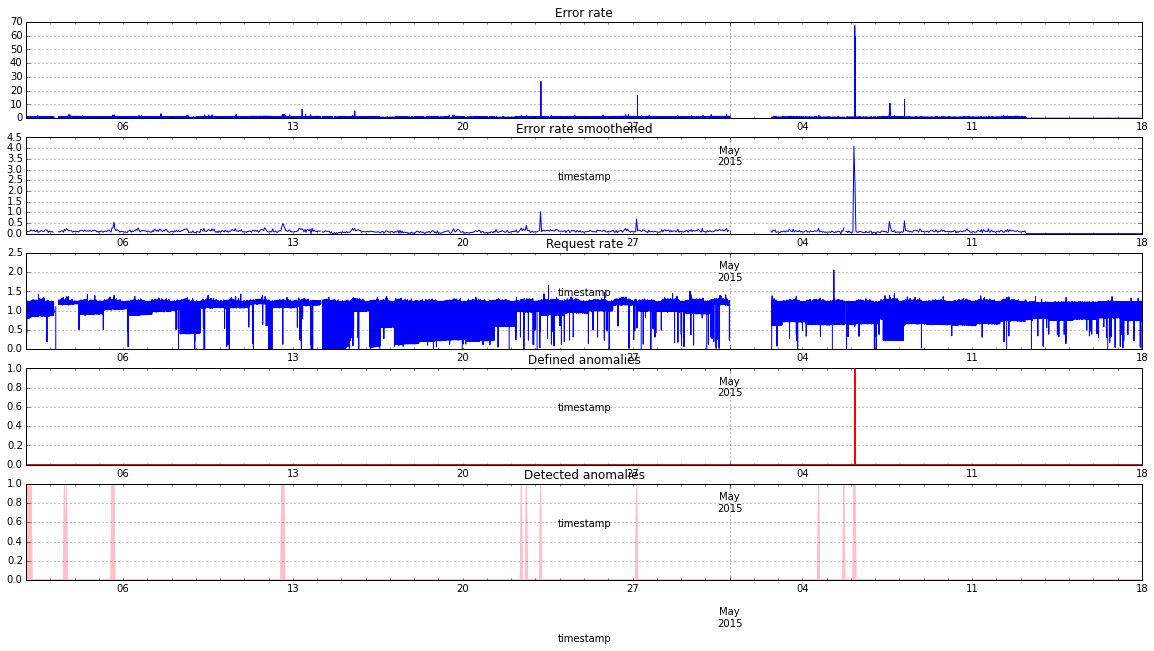

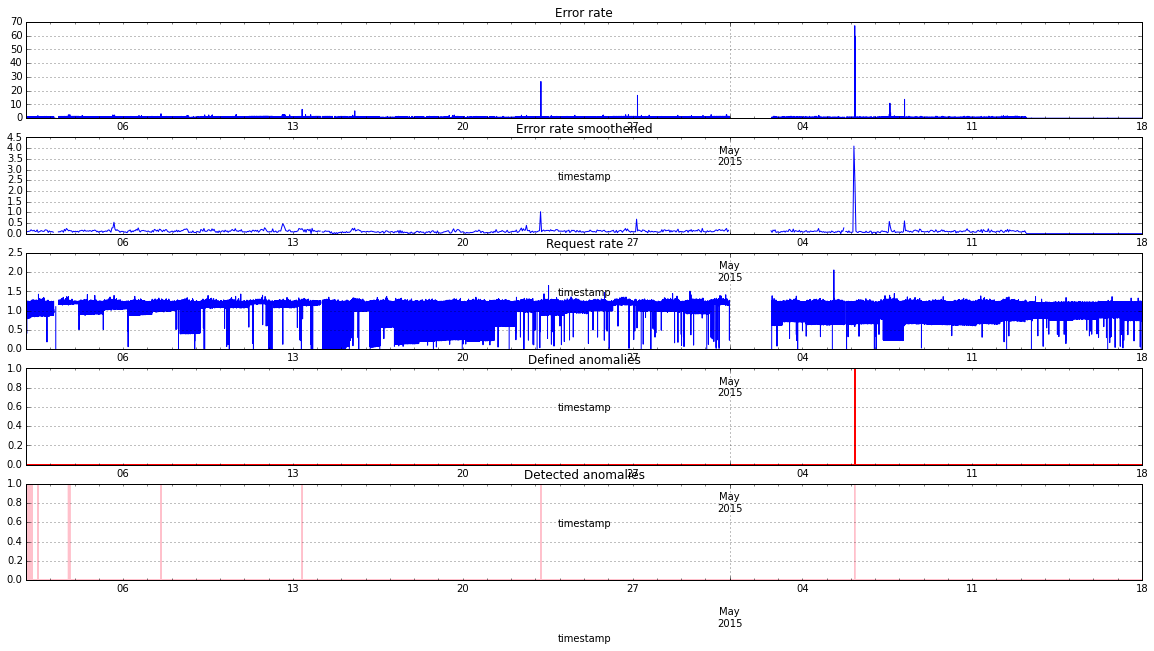

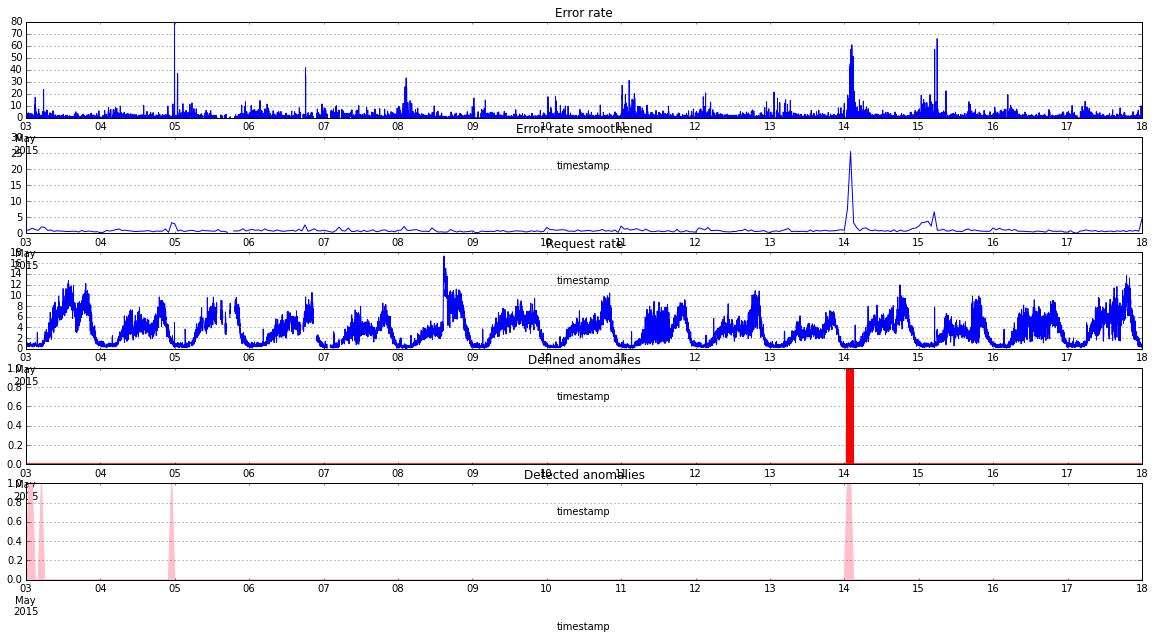

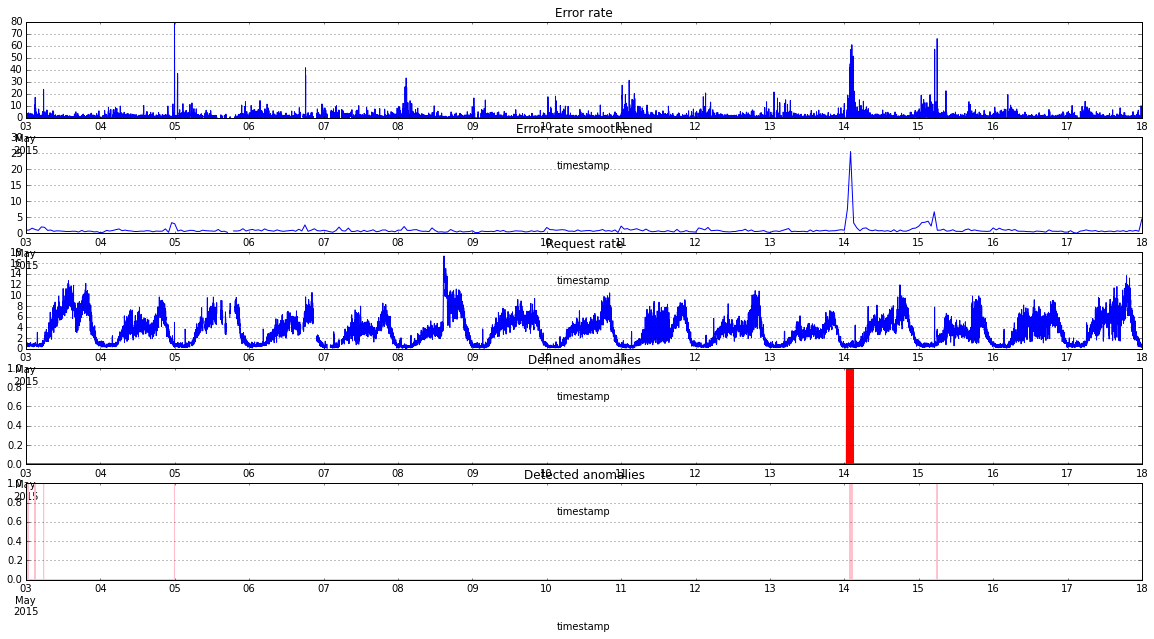

In [127]:
for scen in [vrt2, vrt3, micazu2]:
    print '1H'
    plt.figure()
    evaluate_detector(scen, functools.partial(dunning, '1H', 0.99, 24 * 7, 1))
    print '1T'
    plt.figure()
    evaluate_detector(scen, functools.partial(dunning, '1T', 0.9999, 60 * 24 * 7, 1))

Looks not too bad. Let's now check the budget approach, how.

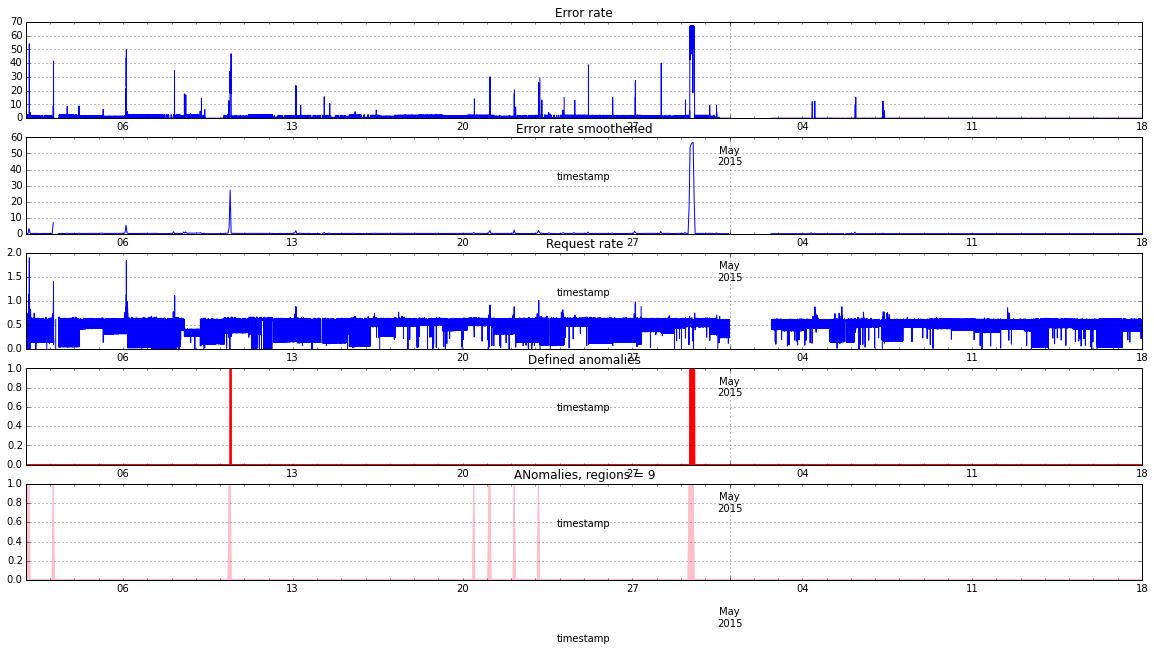

In [150]:
evaluate_detector(vrt1, functools.partial(dunning, '1H', 0.99, 24 * 7, 1))

In [170]:
%matplotlib qt

In [173]:
%matplotlib inline
mpl.rcParams['figure.figsize'] = [20,10]

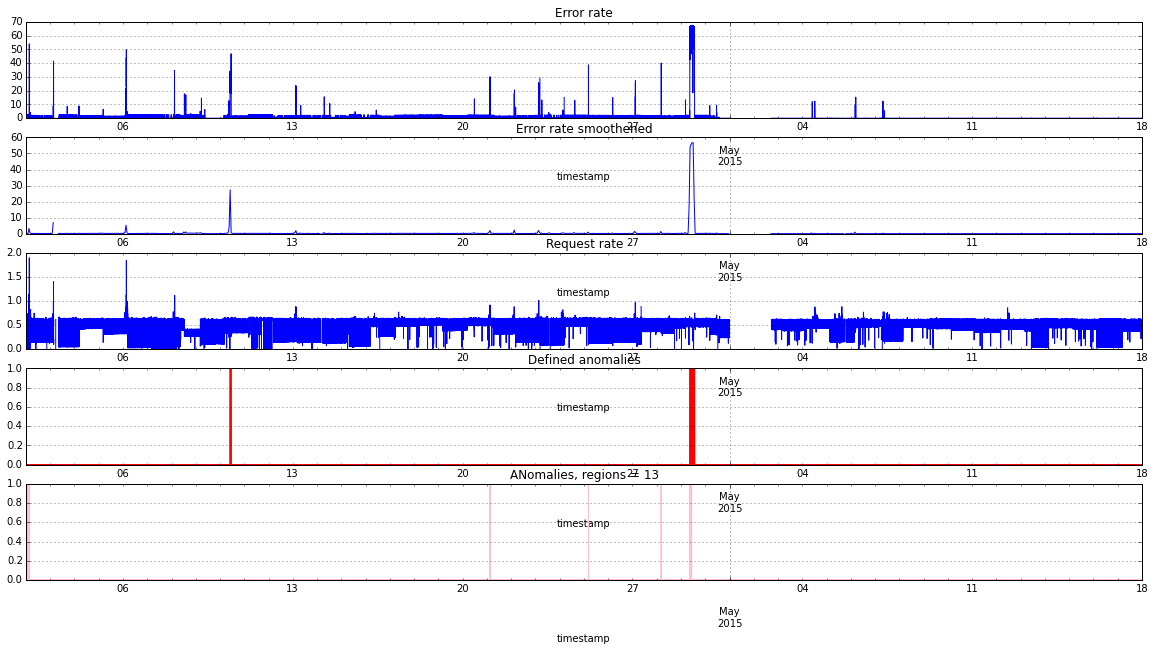

In [165]:
quant = 1 - 1 / (60.0 * 24.0 * 7)
evaluate_detector(vrt1, functools.partial(dunning, '1T', quant, 60 * 24 * 7, 1))

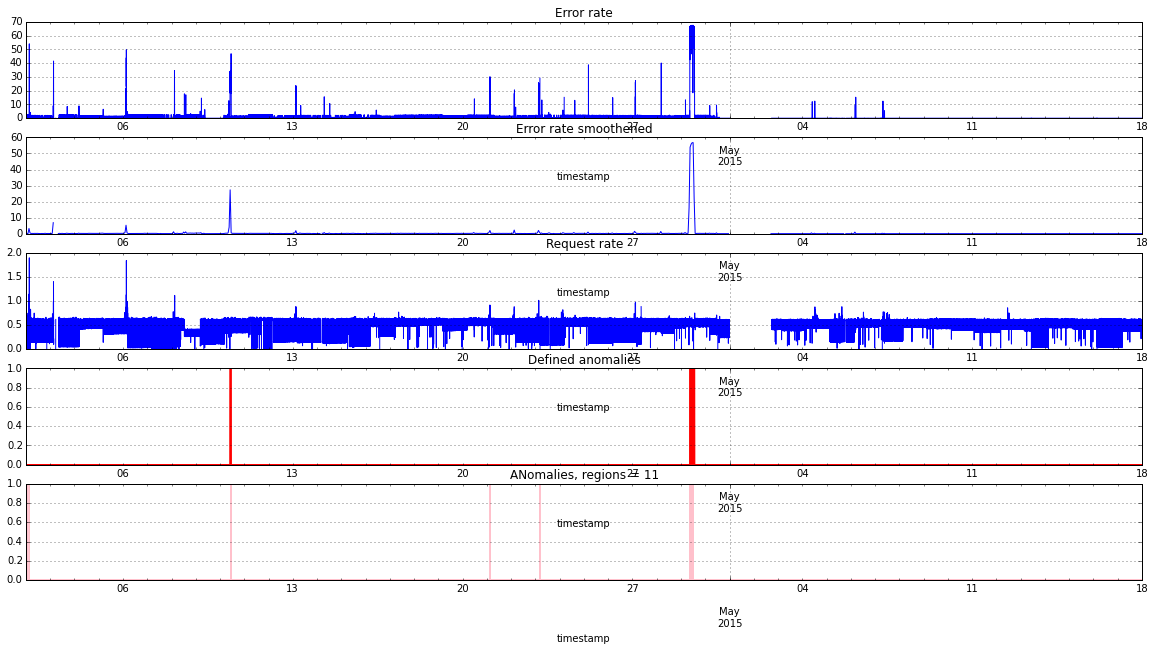

In [167]:
quant = 1 - 1 / (12.0 * 24.0 * 7)
evaluate_detector(vrt1, functools.partial(dunning, '5T', quant, 12 * 24 * 7, 1))

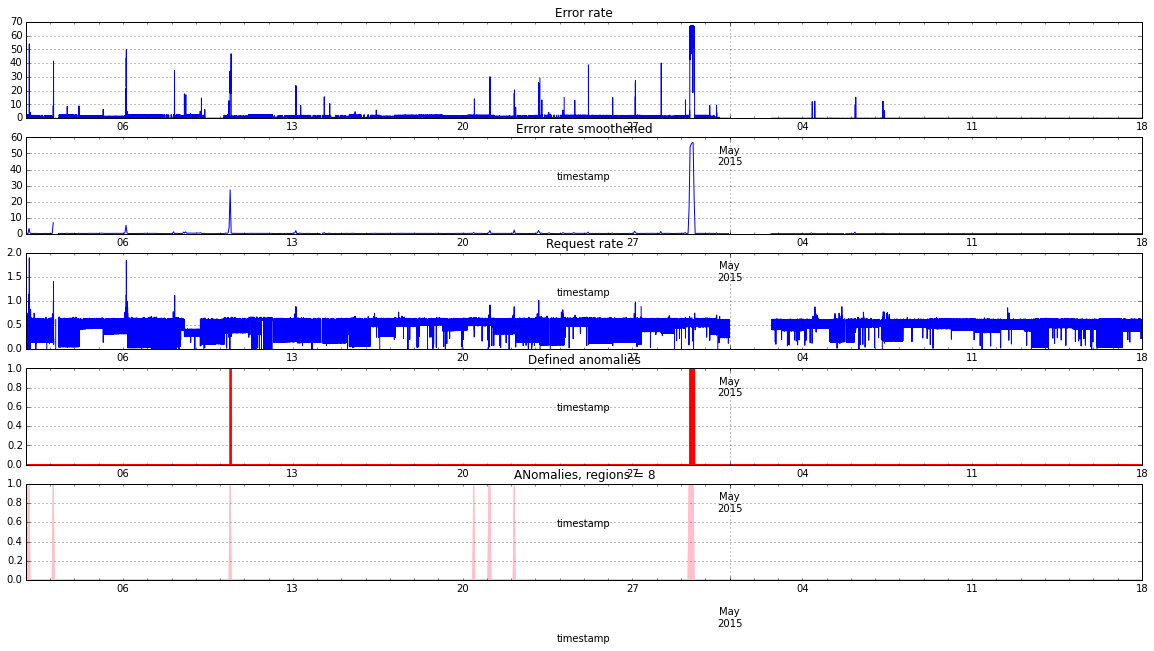

In [174]:
quant = 1 - 1 / (24.0 * 7)
evaluate_detector(vrt1, functools.partial(dunning, '1H', quant, 24 * 7, 1))

Might be a good idea to let anomaly detection run at e.g. 1, 5 and 60 minute interval: anomalies at higher aggregegate intervals shadow lower intervals, but we keep the ability to detect spikes. 

Now maybe a sliding window of 1 week is also rather short, we can make it 1 month. For scalar data this is just still feasible. For latency data that is way too much info to keep for each application.

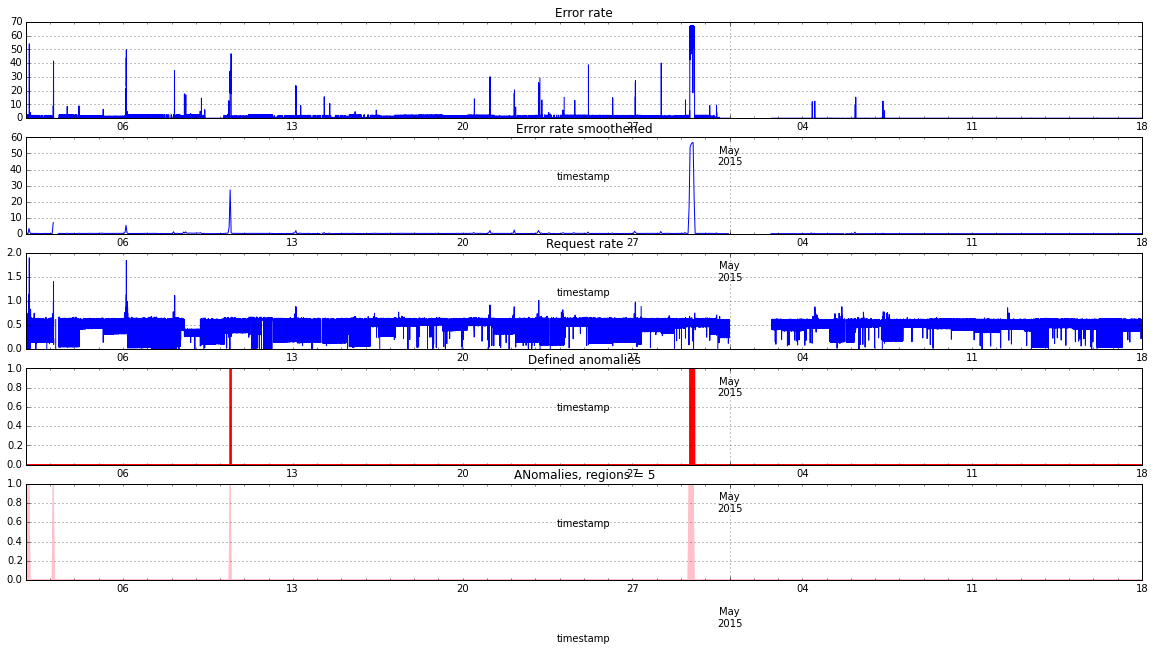

In [176]:
quant = 1 - 1 / (24.0 * 7)
evaluate_detector(vrt1, functools.partial(dunning, '1H', quant, 24 * 30, 2))

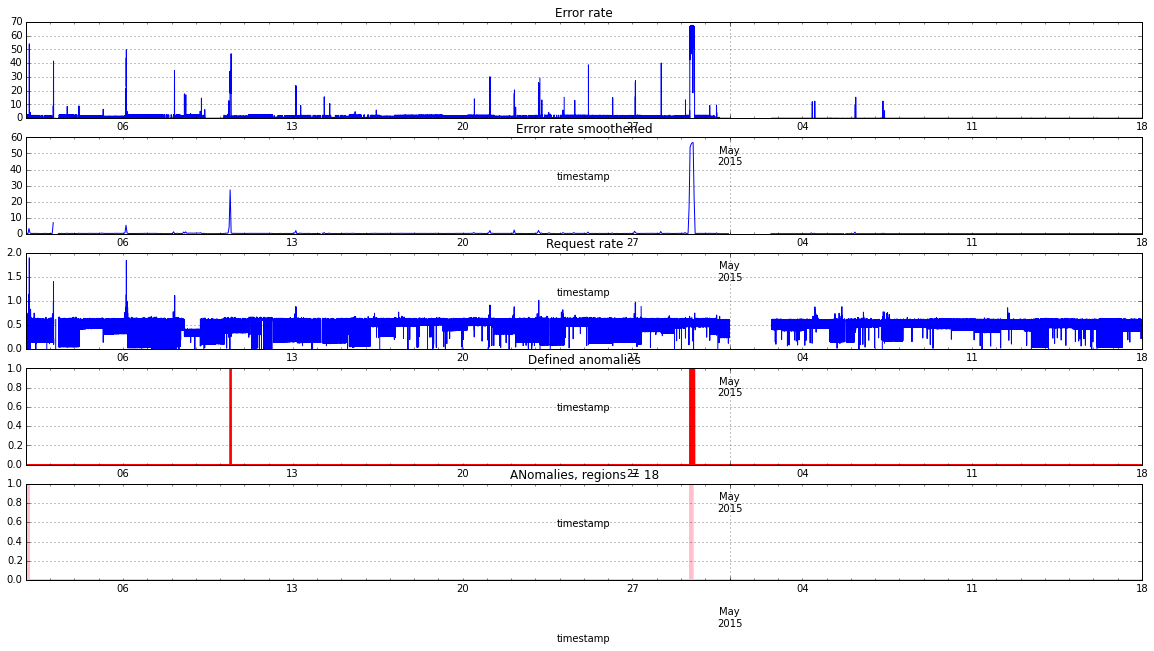

In [177]:
quant = 1 - 1 / (60.0 * 24.0 * 7)
evaluate_detector(vrt1, functools.partial(dunning, '1T', quant, 60 * 24 * 30, 2))

Dunning's idea of budgeting anomalies makes sense, but we are aggregating anomalies from different sources, so we need to be able to rank them somehow and filter after the facts to arrive at a reasonable anomaly rate. Not sure yet how to achieve this. One option is to have reliable anomaly scores to rank on.

Task today: get error detection run on all requests on vrt, micazu, etc. See whether reported anomalies make sense and whether not too many false positives are reported.

Overview of missing data 

In [20]:
def filled_ratio(series):
    return len(series[series.notnull()]) / float(len(series))

In [219]:
vrt_error_request_data.apply(filled_ratio).describe()

count    1180.000000
mean        0.941652
std         0.000188
min         0.941290
25%         0.941532
50%         0.941668
75%         0.941728
max         0.942090
dtype: float64

In [170]:
def all_error_anoms(meta, data, detector):
    """
    Generates dataframe for all valid server-errormetric id combination with anomaly
    score as value for all error metrics.
    """
    dct = {}    
    server_ids = np.unique(data.columns.get_level_values(0))
    for server_id in server_ids:
        for request_id in meta.requests().index:
            training = create_training_set(meta, data, server_id, request_id, [])
            error_id = to_metric_id(meta, request_id, 'ERRORS')
            anomalies = detector(training)
            dct[(server_id, error_id)] = anomalies
            the_index = anomalies.index
    return pd.DataFrame(dct, index=the_index)

In [39]:
def only_requests_rates(meta, data):
    rate_mets = set(meta.requests_metrics()[meta.requests_metrics().request_datatype.eq('RATE')]['metric_id'])
    selection = [p for p in data.columns.get_values().tolist() if p[1] in rate_mets]
    return data.loc[:, selection]

In [58]:
def non_zero_series_count(df):
    return df.shape[1] - df.max().tolist().count(0)

def summerize_dataset(meta, data):
    rates = only_requests_rates(meta, data)
    print "Total #series = " + str(rates.shape[1])
    print "Total #series with non-0 data = " + str(non_zero_series_count(rates))

In [44]:
summerize_dataset(vrt_meta, vrt_error_request_data)    

Total #series = 590
Total #series with non-0 data = 168


In [50]:
def total_regions(result):
    return result.apply(anomaly_regions).sum()

In [ ]:
def series_with_anomalies()

In [62]:
def summerize_anoms(result):
    print "Total #series = " + str(result.shape[1])
    print "Total #series with anomalies = " +  str(non_zero_series_count(result))
    print "Total #anomaly regions = " + str(total_regions(result))
    
    server_ids = set(result.columns.get_level_values(0))
    summary = {}
    for s in server_ids:
        subframe = result.loc[:, s]
        summary[s] = {'regions' : total_regions(subframe),
                      'anom_series' : non_zero_series_count(subframe)}
    print pd.DataFrame(summary).T

In [124]:
def dunning2(resample, quant, window, min_periods, df):
    """
    anom_period: period between two reported anomalies, in minutes, statistically. Together with the 
    frequency of the timeseries, influences the quantile chosen.
    Leaving out first half window stretch for anomalies.
    """
    #only consider error rates where request rate is > 0.2 reqs / s, which means at least 12 
    #observations have been done in a minute, otherwise error rate is too brittle
    data = df['errors'].copy()
    data[df['rate'] < 0.2] = np.nan
    data = data.resample(resample)
    upper = pd.rolling_quantile(data, window=window, quantile=quant, min_periods=min_periods)
    scores = pd.Series(np.where(data > upper, 1, 0), index=data.index)
    scores.iloc[: (window / 2)] = 0 #In The Beginning, there were no anomalies
    return scores

In [125]:
quant = 1 - 1 / (24.0 * 7)
quant = 0.99999999
result = all_error_anoms(vrt_meta, vrt_error_request_data, functools.partial(dunning2, '1H', quant, 24 * 30, 2))

In [126]:
summerize_anoms(result)

Total #series = 590
Total #series with anomalies = 90
Total #anomaly regions = 210
     anom_series  regions
261           11       50
262           12       60
263            8       12
264            7       10
301           11       15
302           10       12
303            4        4
304            5        9
321           10       22
322           12       16


In [127]:
result = result.loc[:, (result > 0).any(axis=0)]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f56e6ae6dd0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f56e7c6a2d0>], dtype=object)

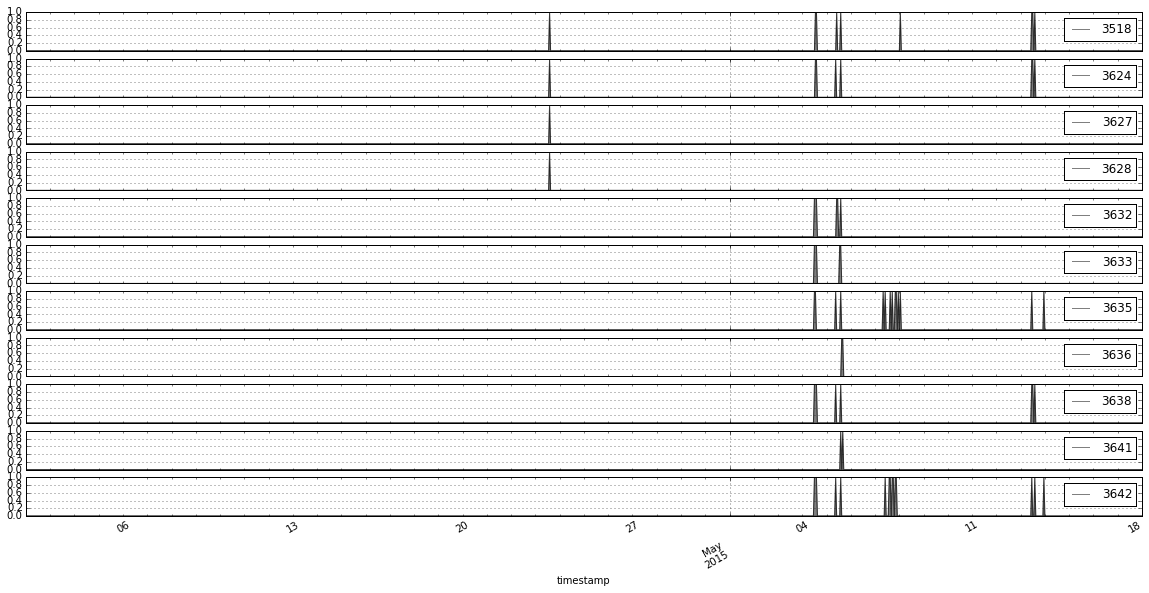

In [130]:
result[261].plot(kind='area', stacked=False, subplots=True)

Lots of correlation between requests that have parent-child relationships, as expected. Maybe we still first need to filter out series which have enough average request rate to start with, otherwize errors don't make too much sense.

In [145]:
means = only_requests_rates(vrt_meta, vrt_error_request_data).mean()
len(means[means > 0.2])

80

So only 80 series have enough 'average' request rate to start doing error rate anomaly detection. Let's build this into our dunning detector

In [159]:
def dunning3(resample, quant, window, min_periods, df):
    """
    anom_period: period between two reported anomalies, in minutes, statistically. Together with the 
    frequency of the timeseries, influences the quantile chosen.
    Leaving out first half window stretch for anomalies.
    """
    #only consider error rates where request rate is > 0.2 reqs / s, which means at least 12 
    #observations have been done in a minute, otherwise error rate is too brittle
    if df['rate'].mean() > 0.2:
        data = df['errors'].copy()
        data[df['rate'] < 0.2] = np.nan
        data = data.resample(resample)
        upper = pd.rolling_quantile(data, window=window, quantile=quant, min_periods=min_periods)
        scores = pd.Series(np.where(data > upper, 1, 0), index=data.index)
        scores.iloc[: (window / 2)] = 0 #In The Beginning, There Were No Anomalies
    else:
        scores = pd.Series(0.0, index=df['errors'].resample(resample).index)
    return scores

In [162]:
quant = 1 - 1 / (24.0 * 7)
quant = 0.99999999
result = all_error_anoms(vrt_meta, vrt_error_request_data, functools.partial(dunning3, '1H', quant, 24 * 30, 2))

In [163]:
summerize_anoms(result)

Total #series = 590
Total #series with anomalies = 64
Total #anomaly regions = 163
     anom_series  regions
261            9       47
262           10       56
263            4        5
264            4        6
301            7        8
302            8       10
303            4        4
304            5        9
321            6        9
322            7        9


So we filtered out hopefully the more interesting anomalies. Let's see what micazu tells us.

In [173]:
quant = 0.99
result = all_error_anoms(micazu_meta, micazu_error_request_data, functools.partial(dunning3, '1H', quant, 24 * 30, 2))

In [174]:
summerize_anoms(result)

Total #series = 144
Total #series with anomalies = 1
Total #anomaly regions = 1
     anom_series  regions
230            1        1


We have an anomaly but we needed to tweak the percentile to a much lower value than in case of the VRT. Let's see what is looks like

In [176]:
result = result.loc[:, (result > 0).any(axis=0)]

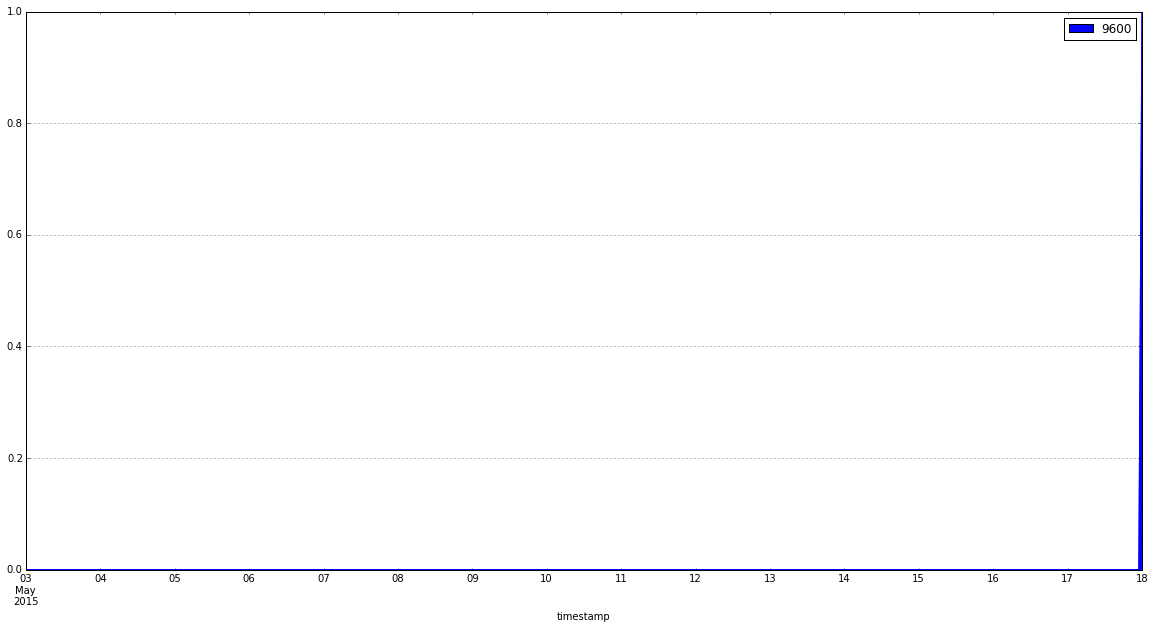

In [177]:
result[230].plot(kind='area')

In [179]:
to_request_id(micazu_meta, 9600)

891

In [180]:
micazu_meta.print_request_tree()

597 COSCALE_ROOT
 | 1025 onsfamiliehuis.nl
 | 1026 beheermijnvakantiewoning.nl
 |  | 1173 www.beheermijnvakantiewoning.nl
 |  |  | 1135 Images
 | 1027 particulierevakantiehuizen.nl
 | 1156 d-rent.nl
 | 1003 micazu.com
 |  | 1028 email.micazu.com
 |  | 1005 mail.micazu.com
 |  |  | 1136 HO
 |  |  | 1154 vakantiehuis
 |  |  | 1174 IL
 | 1004 vakantiewoningdirect.nl
 | 1137 micazu.nu
 | 1155 micasu.be
 | 1175 worldhomerentals.com
 | 1176 micazushop.com
 | 701 micazu.nl
 |  | 721 admin.micazu.nl
 |  |  | 722 Includes
 |  |  |  | 704 Css
 |  |  |  | 862 Js
 |  |  | 844 Images
 |  |  | 702 Content
 |  |  |  | 741 Renter
 |  |  |  | 742 House
 |  |  |  | 723 Home
 |  |  |  | 724 Users
 |  |  |  | 861 CoreData
 |  |  |  | 703 Security
 |  | 882 s1.micazu.nl
 |  |  | 885 Includes
 |  | 890 *.micazu.nl
 |  |  | 960 moederdag
 |  |  | 961 Includes
 |  |  | 1029 test
 |  |  | 937 (static)
 |  |  | 938 inloggen
 |  |  | 939 Images
 |  |  | 940 promotie
 |  |  | 1006 wordpress
 |  |  | 981 contact
 

ts = create_training_set(micazu_meta, micazu_error_request_data, 230, 891, [])

In [133]:
%matplotlib qt

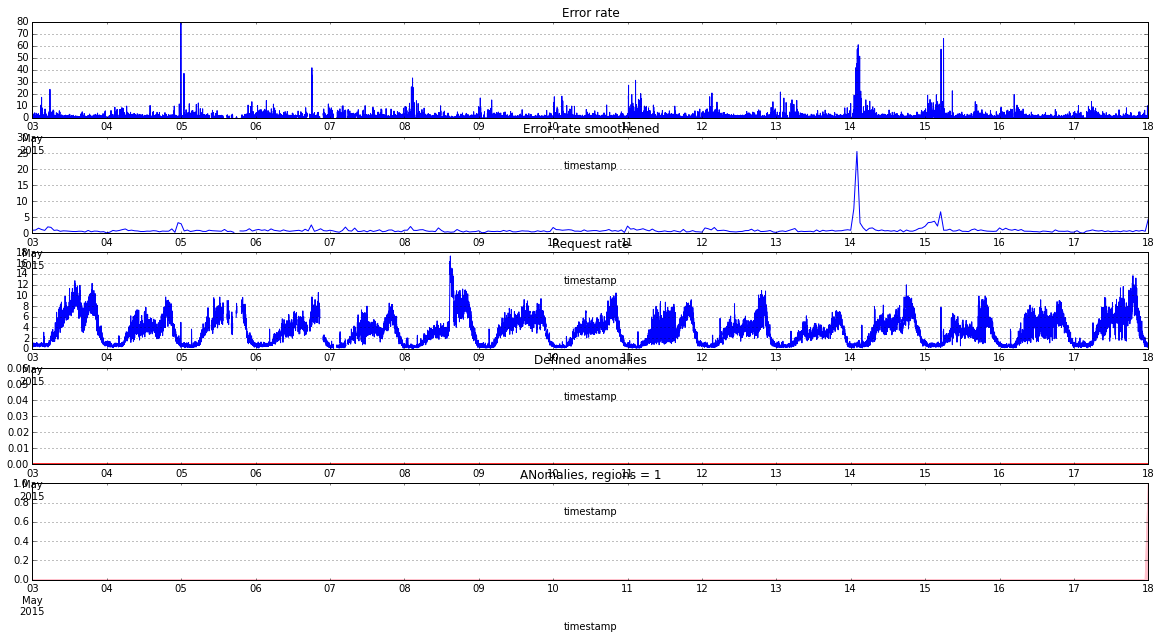

In [185]:
evaluate_detector(ts, functools.partial(dunning3, '1H', quant, 24 * 30, 2))

First peek is not detected because it still falls within the training period. Let'smake that configurable

In [184]:
def dunning4(resample, quant, window, silent_window, min_periods, df):
    """
    anom_period: period between two reported anomalies, in minutes, statistically. Together with the 
    frequency of the timeseries, influences the quantile chosen.
    Leaving out first half window stretch for anomalies.
    """
    #only consider error rates where request rate is > 0.2 reqs / s, which means at least 12 
    #observations have been done in a minute, otherwise error rate is too brittle
    if df['rate'].mean() > 0.2:
        data = df['errors'].copy()
        data[df['rate'] < 0.2] = np.nan
        data = data.resample(resample)
        upper = pd.rolling_quantile(data, window=window, quantile=quant, min_periods=min_periods)
        scores = pd.Series(np.where(data > upper, 1, 0), index=data.index)
        scores.iloc[: silent_window] = 0 #In The Beginning, There Were No Anomalies
    else:
        scores = pd.Series(0.0, index=df['errors'].resample(resample).index)
    return scores

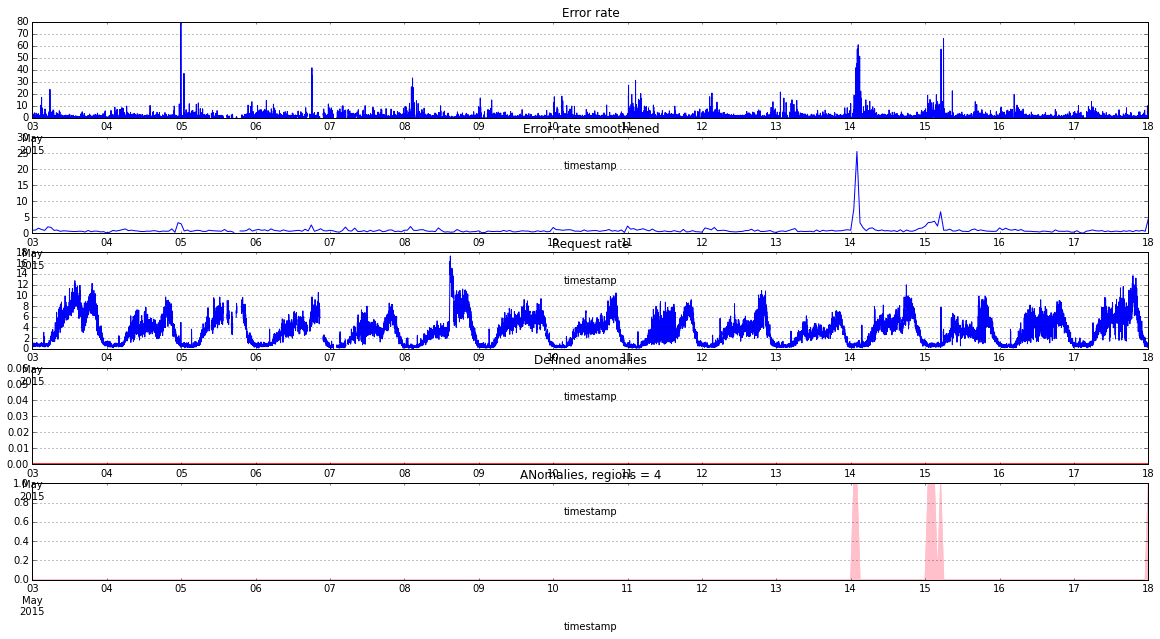

In [186]:
evaluate_detector(ts, functools.partial(dunning4, '1H', quant, 24 * 30, 24 * 7, 2))

This looks much nicer

TODO for tomorrow:
    - re-check quantiles to choose (vrt + micazu), whether we can find some interesting heuristic. 
    - write a tentative spec for behavior of anomaly detection on error rates (also document weird behavior of error rates in aggeration)
    - ?? look into multiple time-window aggregates? Maybe not for now, after rates and latencies ...
    - look at request rates

## Summary for error rate anomaly detection

Technique which works +- well atm:
- only consider requests with average rate > 0.2
- for remainder series, set error rates to NaN at time where request rate < 0.2
- use percentile based anomly detector, window = 1 month but anomalies can be reported after one week

Remark:
- error rates as currently collected are bit tricky, because, unlike latency histograms, they don't contain information on the number of requests they were calculated on. Error rates at times with low request rates are given the same weight as error rates from more busy intervals. This affects both the comparison of error rates over different time, like we do for anomly detection and why we add the constraint on the error rate. But it also affects the aggregation done by the roller in the datastore.

Still unclear:
- choice of percentile: if we want to control the overall anomaly rate for an application we need to take into account the number of metrics we are doing analysis on and adapt the percentile there
- 'natural ranking of anomalies': not clear yet/ It would be nice to be able to select a level 'after the facts' based e.g. on a anomaly score. But with simple percentile technique it's now just 1 / 0 for anomalies

## Testing against implementation

In [12]:
from anomalyservice.detector.error_model import ErrorRequestModel

In [ ]:
def check_model(quantile, window, minimal_points, request_rate_minimum, ts, model):
    for i in xrange(ts.shape[0]):
        model.update()
        ts.iloc[i]['errors']

In [13]:
anomalyservice.detector.
anomalyservice.utils.busy_decorator()


# Appendix: Correlation / clustering analysis

In [49]:
def plot_tres_anoms(data, tres):
    """
    Function which plots data together with a treshold line and a color bar indication which portions exceed
    the treshold.
    """
    f, axarr = plt.subplots(2, sharex=True)
    data_axes = axarr[0]
    anombar_axes = axarr[1]
    
    anom_data = np.where(data > tres, 1, 0)
    anombar_axes.plot(anom_data, 'r')
    
    data_axes.plot(data,'bo-')
    data_axes.axhline(y = tres, linewidth=2.0, color='r')
    data_axes.legend(['data', 'treshold'])

In [61]:
%matplotlib qt

In [141]:
%matplotlib inline
mpl.rcParams['figure.figsize'] = [20,10]

In [51]:
cubapbestag_servers = [263,264]

In [52]:
r = vrt_meta.requests()
contentstore_vrt_be_req_id = r[r.name.eq('contentstore.vrt.be')].index[0]
contentstore_vrt_be_req_id

1024

In [53]:
rm = vrt_meta.requests_metrics()
rm = rm[rm.request_id.eq(contentstore_vrt_be_req_id)]
rm = rm[rm.request_datatype.eq('ERRORS')]
contentstore_vrt_be_errors_mid = rm.metric_id.values[0]
contentstore_vrt_be_errors_mid

10091

In [9]:
samp = vrt_error_data.loc[:, [(263, contentstore_vrt_be_errors_mid)]]

In [47]:
plot_tres_anoms(samp.resample('1T'), 1)

In [127]:
rmean = pd.rolling_mean(samp, 7000, center=True)

samp.resample('12H').plot()

In [165]:
len(samp[samp.iloc[:,0] == 0])

61960

In [172]:
-np.log(samp)

server_id                   263
metric_id                 10091
timestamp                      
2015-04-02 00:00:00+00:00   inf
2015-04-02 00:01:00+00:00   inf
2015-04-02 00:02:00+00:00   inf
2015-04-02 00:03:00+00:00   inf
2015-04-02 00:04:00+00:00   inf
2015-04-02 00:05:00+00:00   inf
2015-04-02 00:06:00+00:00   inf
2015-04-02 00:07:00+00:00   inf
2015-04-02 00:08:00+00:00   inf
2015-04-02 00:09:00+00:00   inf
2015-04-02 00:10:00+00:00   inf
2015-04-02 00:11:00+00:00   inf
2015-04-02 00:12:00+00:00   inf
2015-04-02 00:13:00+00:00   inf
2015-04-02 00:14:00+00:00   inf
2015-04-02 00:15:00+00:00   inf
2015-04-02 00:16:00+00:00   inf
2015-04-02 00:17:00+00:00   inf
2015-04-02 00:18:00+00:00   inf
2015-04-02 00:19:00+00:00   inf
2015-04-02 00:20:00+00:00   inf
2015-04-02 00:21:00+00:00   inf
2015-04-02 00:22:00+00:00   inf
2015-04-02 00:23:00+00:00   inf
2015-04-02 00:24:00+00:00   inf
2015-04-02 00:25:00+00:00   inf
2015-04-02 00:26:00+00:00   inf
2015-04-02 00:27:00+00:00   inf
2015-04-02 00:28:00+00:00   inf
2015-04-02 00:29:00+00:00   inf
...                         ...
2015-05-17 23:31:00+00:00   inf
2015-05-17 23:32:00+00:00   inf
2015-05-17 23:33:00+00:00   inf
2015-05-17 23:34:00+00:00   inf
2015-05-17 23:35:00+00:00   inf
2015-05-17 23:36:00+00:00   inf
2015-05-17 23:37:00+00:00   inf
2015-05-17 23:38:00+00:00   inf
2015-05-17 23:39:00+00:00   inf
2015-05-17 23:40:00+00:00   inf
2015-05-17 23:41:00+00:00   inf
2015-05-17 23:42:00+00:00   inf
2015-05-17 23:43:00+00:00   inf
2015-05-17 23:44:00+00:00   inf
2015-05-17 23:45:00+00:00   inf
2015-05-17 23:46:00+00:00   inf
2015-05-17 23:47:00+00:00   inf
2015-05-17 23:48:00+00:00   inf
2015-05-17 23:49:00+00:00   inf
2015-05-17 23:50:00+00:00   inf
2015-05-17 23:51:00+00:00   inf
2015-05-17 23:52:00+00:00   inf
2015-05-17 23:53:00+00:00   inf
2015-05-17 23:54:00+00:00   inf
2015-05-17 23:55:00+00:00   inf
2015-05-17 23:56:00+00:00   inf
2015-05-17 23:57:00+00:00   inf
2015-05-17 23:58:00+00:00   inf
2015-05-17 23:59:00+00:00   inf
2015-05-18 00:00:00+00:00   inf

[66241 rows x 1 columns]

In [170]:
samp.quantile(np.arange(0,1,0.01))

server_id   263
metric_id 10091
0.00          0
0.01          0
0.02          0
0.03          0
0.04          0
0.05          0
0.06          0
0.07          0
0.08          0
0.09          0
0.10          0
0.11          0
0.12          0
0.13          0
0.14          0
0.15          0
0.16          0
0.17          0
0.18          0
0.19          0
0.20          0
0.21          0
0.22          0
0.23          0
0.24          0
0.25          0
0.26          0
0.27          0
0.28          0
0.29          0
...         ...
0.70          0
0.71          0
0.72          0
0.73          0
0.74          0
0.75          0
0.76          0
0.77          0
0.78          0
0.79          0
0.80          0
0.81          0
0.82          0
0.83          0
0.84          0
0.85          0
0.86          0
0.87          0
0.88          0
0.89          0
0.90          0
0.91          0
0.92          0
0.93          0
0.94          0
0.95          0
0.96          0
0.97          0
0.98          0
0.99          0

[100 rows x 1 columns]

In [166]:
sam

263
              10091
count  62403.000000
mean       0.364191
std        4.997820
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max      100.000000

In [110]:
plt.plot(samp.index, samp, 'b')
resamp = samp.resample('4H')
plt.plot(resamp.index, resamp, 'g')

In [116]:
resamp1 = samp.resample('5T')
smooth1 = pd.rolling_mean(samp, 5 * 60, center=True)
plt.plot(resamp1.index, resamp1, 'b')
plt.plot(smooth1.index, smooth1, 'g')

In [91]:
samp.describe()

263
              10091
count  62403.000000
mean       0.364191
std        4.997820
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max      100.000000

In [100]:
rmean.plot()

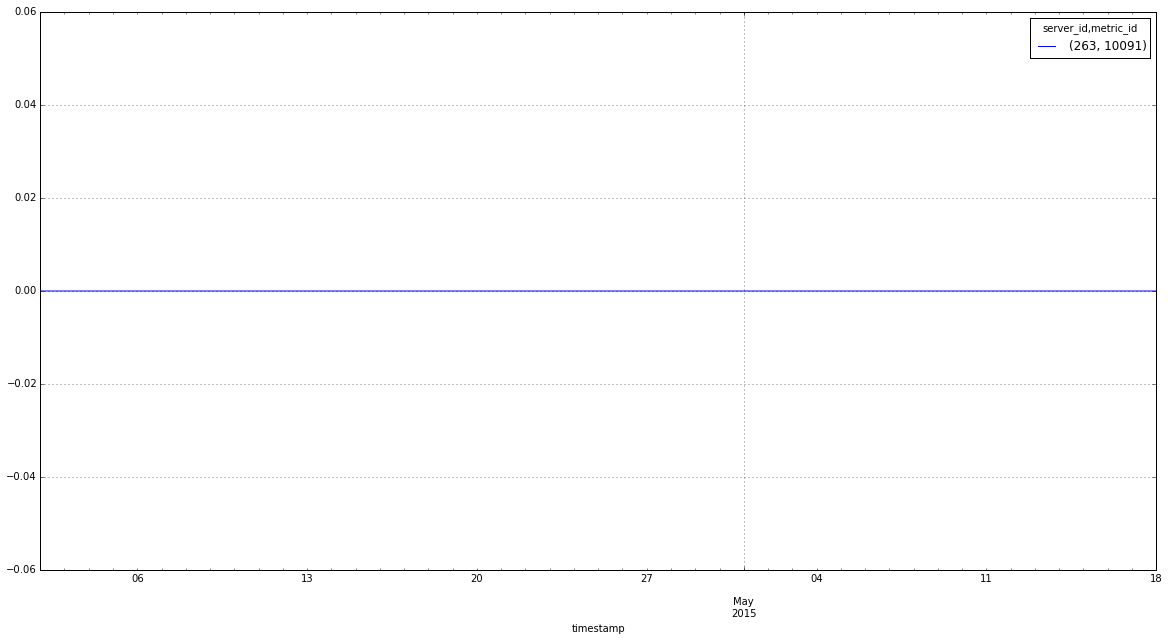

In [75]:
est = samp > rmean
est.plot()

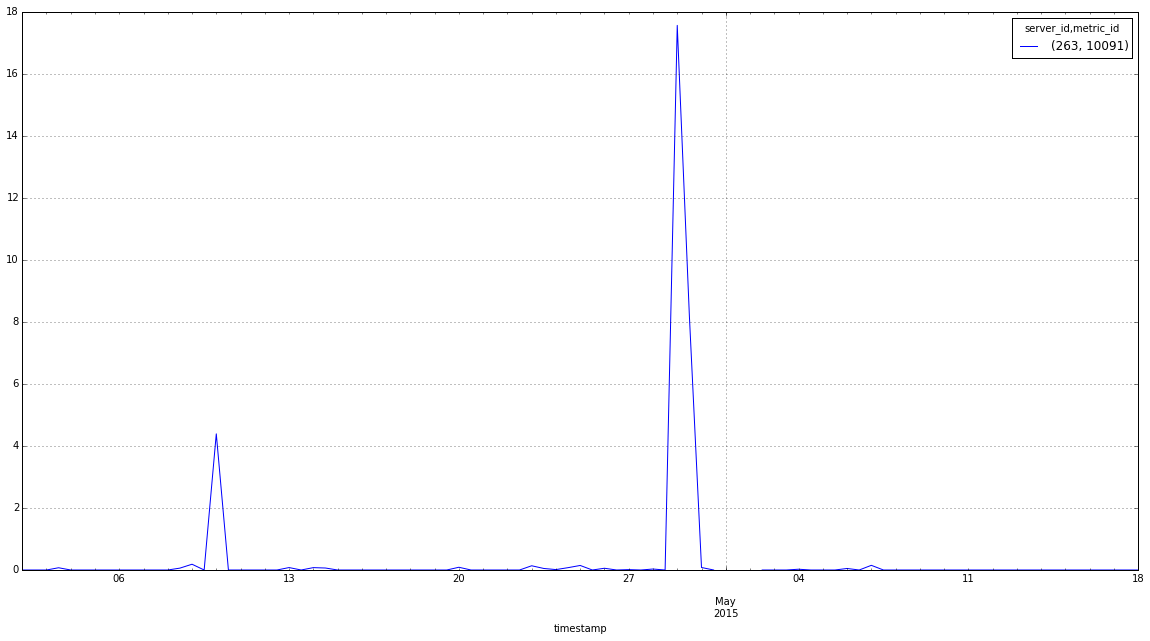

In [65]:
samp.resample('12H').plot()

In [49]:
vals = samp.values.T[0]

## Correlations

In [4]:
m = vrt_error_data.describe().loc['max']
print "Columns = %d" % len(m)
print "Non-zeroes = %d" % len(m[m > 0])

Columns = 601
Non-zeroes = 159


In [5]:
m = vrt_error_data.describe().loc['max']

In [6]:
filtered = vrt_error_data.loc[:, m > 0]

In [7]:
corr = filtered.corr()

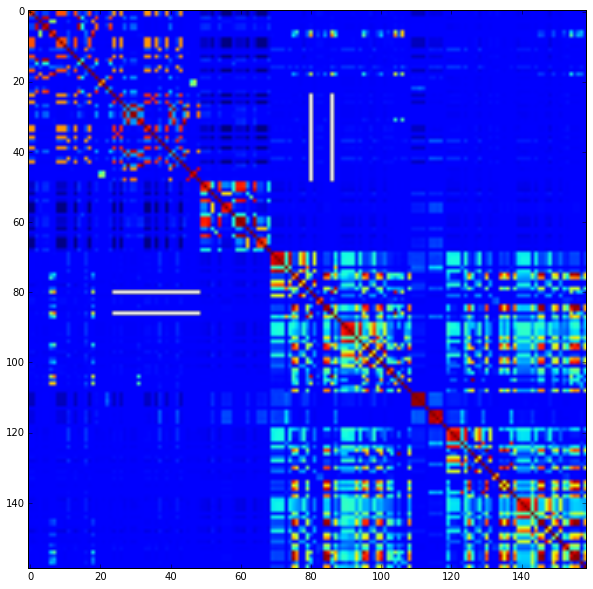

In [11]:
plt.imshow(corr)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa4b1685650>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7fa49efb1710>], dtype=object)

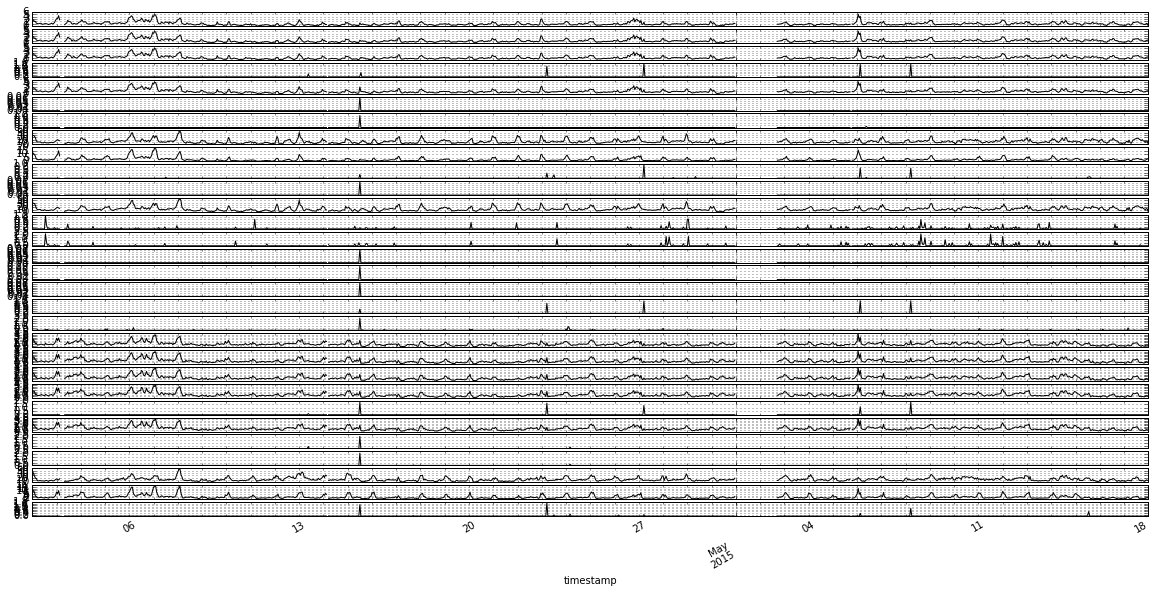

In [12]:
filtered.iloc[:,120:150].resample('1H').plot(subplots=True, legend=False)

In [186]:
list(af.labels_)

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 2,
 0,
 2,
 3,
 3,
 2,
 2,
 3,
 0,
 2,
 0,
 0,
 3,
 3,
 0,
 3,
 0,
 2,
 2,
 2,
 2,
 3,
 2,
 3,
 3,
 2,
 2,
 3,
 3,
 2,
 3,
 3,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 2,
 2,
 0,
 2,
 3,
 0,
 2,
 2,
 0,
 3,
 2,
 0,
 0,
 3,
 3,
 3,
 0,
 3,
 2,
 2,
 2,
 2,
 3,
 2,
 3,
 3,
 0,
 2,
 3,
 3,
 0,
 3,
 3,
 3,
 3,
 3,
 0,
 3]

In [187]:
[list(af.labels_).count(i) for i in range(4)]

[90, 8, 30, 31]

In [178]:
order = np.array(sorted(zip(af.labels_, range(len(af.labels_))), key = lambda x : x[0]))[:,1]

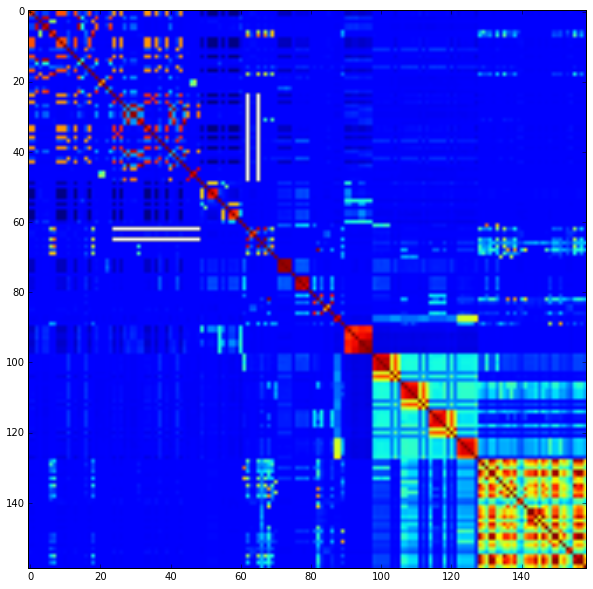

In [181]:
plt.imshow(corr.values[order, :][:, order])

In [119]:
af = AffinityPropagation(preference=-50).fit(np.nan_to_num(corr.values))

In [120]:
af.cluster_centers_indices_

array([ 22,  59,  98, 150])

In [132]:
clusters = utils.groupBy(zip(filtered.columns.values, af.labels_), lambda x: x[-1])

In [188]:
clusters

{0: [((261, 3518), 0),
  ((261, 3624), 0),
  ((261, 3625), 0),
  ((261, 3626), 0),
  ((261, 3627), 0),
  ((261, 3628), 0),
  ((261, 3629), 0),
  ((261, 3630), 0),
  ((261, 3632), 0),
  ((261, 3633), 0),
  ((261, 3635), 0),
  ((261, 3636), 0),
  ((261, 3637), 0),
  ((261, 3638), 0),
  ((261, 3639), 0),
  ((261, 3640), 0),
  ((261, 3641), 0),
  ((261, 3642), 0),
  ((261, 3643), 0),
  ((261, 9209), 0),
  ((261, 10214), 0),
  ((261, 10237), 0),
  ((261, 10420), 0),
  ((261, 10427), 0),
  ((262, 3518), 0),
  ((262, 3623), 0),
  ((262, 3624), 0),
  ((262, 3625), 0),
  ((262, 3626), 0),
  ((262, 3627), 0),
  ((262, 3628), 0),
  ((262, 3629), 0),
  ((262, 3630), 0),
  ((262, 3632), 0),
  ((262, 3633), 0),
  ((262, 3634), 0),
  ((262, 3635), 0),
  ((262, 3636), 0),
  ((262, 3637), 0),
  ((262, 3638), 0),
  ((262, 3639), 0),
  ((262, 3640), 0),
  ((262, 3641), 0),
  ((262, 3642), 0),
  ((262, 3643), 0),
  ((262, 9209), 0),
  ((262, 10214), 0),
  ((262, 10237), 0),
  ((262, 10427), 0),
  ((263, 1

In [ ]:
%matplotlib qt

In [ ]:
vrt_error_data.loc[:,[x[0] for x in clusters[1]]].resample('1H').plot(subplots=True, legend=False)

In [154]:
for k, c in clusters.iteritems():
    print "======= Cluster %d servers =======" % k
    server_ids = set([x[0][0] for x in c])
    s = vrt_meta.servers()
    print s[s.id.isin(server_ids)]['name']

    metric_ids = set([x[0][1] for x in c])
    rm = vrt_meta.requests_metrics()
    rm = rm[rm.metric_id.isin(metric_ids)]
    rm = rm.join(vrt_meta.requests(), on='request_id')['name']    
    print "======= Cluster %d metrics =======" % k
    print rm
    

======= Cluster 0 servers =======
id
261    cubapfestag1
262    cubapfestag2
263    cubapbestag2
264    cubapbestag1
301    cubapfeprod1
302    cubapfeprod4
303    cubapbeprod1
304    cubapbeprod2
321    cubapfeprod2
322    cubapfeprod3
Name: name, dtype: object
======= Cluster 0 metrics =======
2                             COSCALE_ROOT
7                                   vrt.be
12                         csclient.vrt.be
17                    csclient-stag.vrt.be
22                                  client
27                                  client
32                                     mvc
37                                     mvc
42                                contents
47                                  detail
52                                   admin
57                                   admin
62                                  config
67                                 related
72                                 (token)
77                         ?channel=sporza
82        sporz

In [153]:
rm = vrt_meta.requests_metrics()
rm = rm[rm.metric_id.isin([3417])]
rm.join(vrt_meta.requests(), on='request_id')['name']

0    COSCALE_ROOT
Name: name, dtype: object

In [129]:
vrt_meta.servers()

description   id           name         source  \
id                                                                             
261   Created by agent for 'cubapfestag1'  261   cubapfestag1  CoScale Agent   
262   Created by agent for 'cubapfestag2'  262   cubapfestag2  CoScale Agent   
263   Created by agent for 'cubapbestag2'  263   cubapbestag2  CoScale Agent   
264   Created by agent for 'cubapbestag1'  264   cubapbestag1  CoScale Agent   
301   Created by agent for 'cubapfeprod1'  301   cubapfeprod1  CoScale Agent   
302   Created by agent for 'cubapfeprod4'  302   cubapfeprod4  CoScale Agent   
303   Created by agent for 'cubapbeprod1'  303   cubapbeprod1  CoScale Agent   
304   Created by agent for 'cubapbeprod2'  304   cubapbeprod2  CoScale Agent   
305       Created by agent for 'webstag1'  305       webstag1  CoScale Agent   
321   Created by agent for 'cubapfeprod2'  321   cubapfeprod2  CoScale Agent   
322   Created by agent for 'cubapfeprod3'  322   cubapfeprod3  CoScale Agent   
441  Created by agent for 'cubmongostag1'  441  cubmongostag1  CoScale Agent   

        state type  version  
id                           
261   ENABLED             2  
262   ENABLED             2  
263   ENABLED             2  
264   ENABLED             2  
301   ENABLED             2  
302   ENABLED             2  
303   ENABLED             2  
304   ENABLED             2  
305  DISABLED             3  
321   ENABLED             2  
322   ENABLED             2  
441   ENABLED             2

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f873a0ed990>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f8739e394d0>], dtype=object)

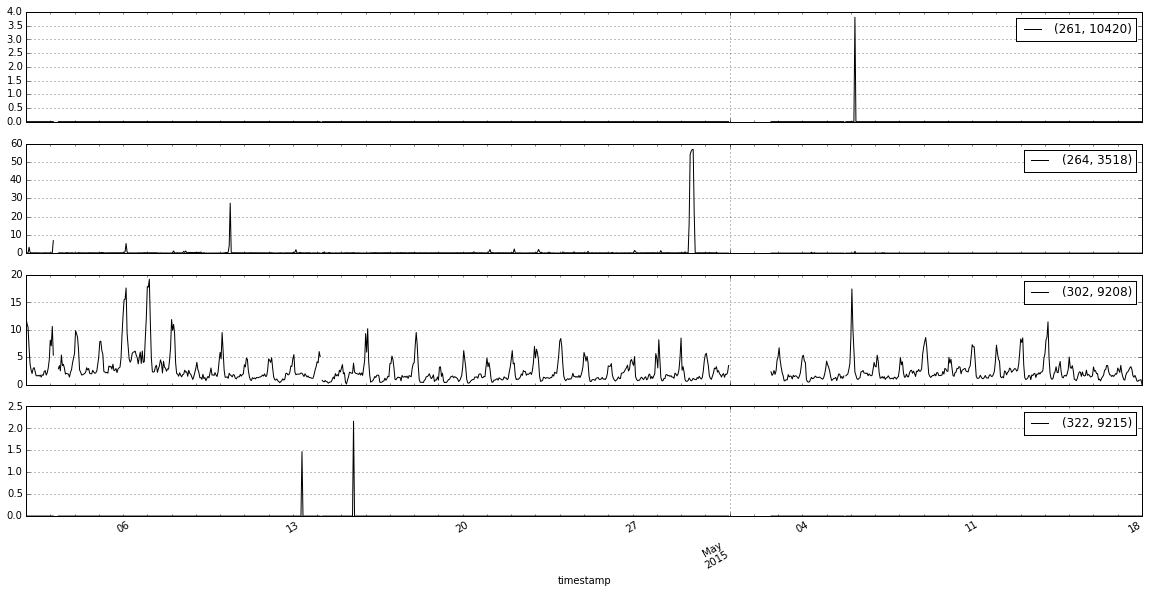

In [122]:
filtered.iloc[:, af.cluster_centers_indices_].resample('1H').plot(subplots=True)

In [95]:
import sklearn

In [100]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs

##############################################################################
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=300, centers=centers, cluster_std=0.5,
                            random_state=0)

Estimated number of clusters: 3
Homogeneity: 0.872
Completeness: 0.872
V-measure: 0.872
Adjusted Rand Index: 0.912
Adjusted Mutual Information: 0.871
Silhouette Coefficient: 0.753


/usr/local/lib/python2.7/dist-packages/numpy/core/fromnumeric.py:2499: VisibleDeprecationWarning: `rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
  VisibleDeprecationWarning)


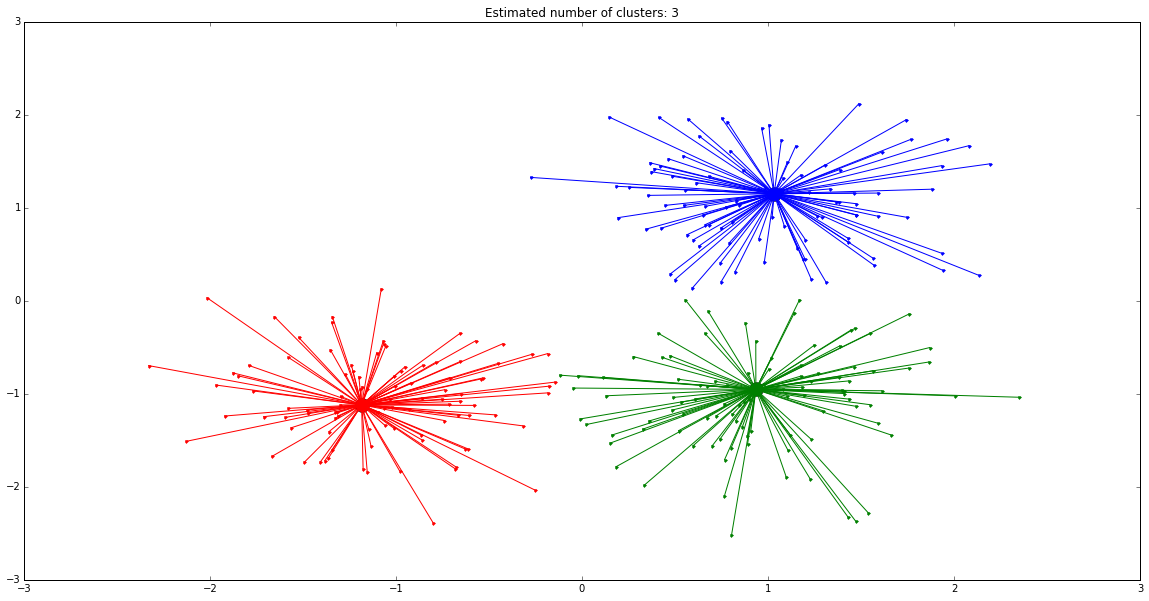

In [96]:
##############################################################################
# Compute Affinity Propagation
af = AffinityPropagation(preference=-50).fit(X)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)

print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels, metric='sqeuclidean'))

##############################################################################
# Plot result
import matplotlib.pyplot as plt
from itertools import cycle

plt.close('all')
plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X[cluster_centers_indices[k]]
    plt.plot(X[class_members, 0], X[class_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
    for x in X[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

##Lingala

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa49086ef10>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7fa4904061d0>], dtype=object)

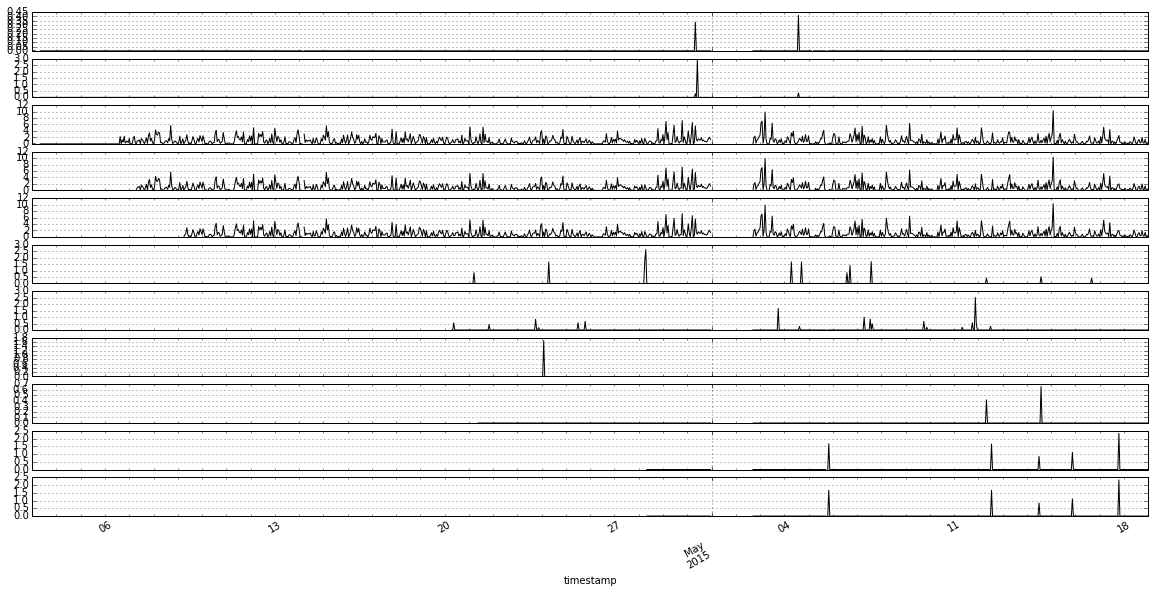

In [20]:
lingala_error_data.loc[:, lingala_error_data.max() > 0].resample('1H').plot(subplots=True, legend=False)

##About blank

In [26]:
filt = micazu_error_data.loc[:, micazu_error_data.max() > 0]

In [34]:
filt.shape

(21601, 39)

In [27]:
%matplotlib qt

In [39]:
filt[filt.index < "2015-05-08"].iloc[:, 0:10].resample('15T').plot(subplots=True, legend=False)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa47f161090>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7fa47e0ba090>], dtype=object)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa480769e90>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7fa47cb08e90>], dtype=object)

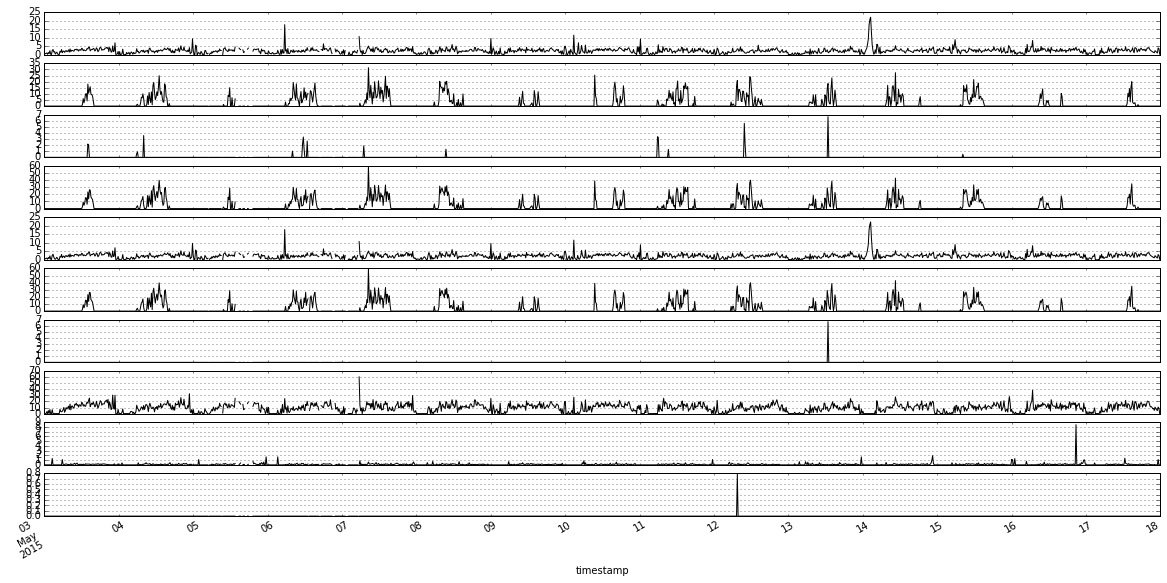

In [41]:
filt.iloc[:, 0:10].resample('15T').plot(subplots=True, legend=False)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa47c49e250>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7fa47c068750>], dtype=object)

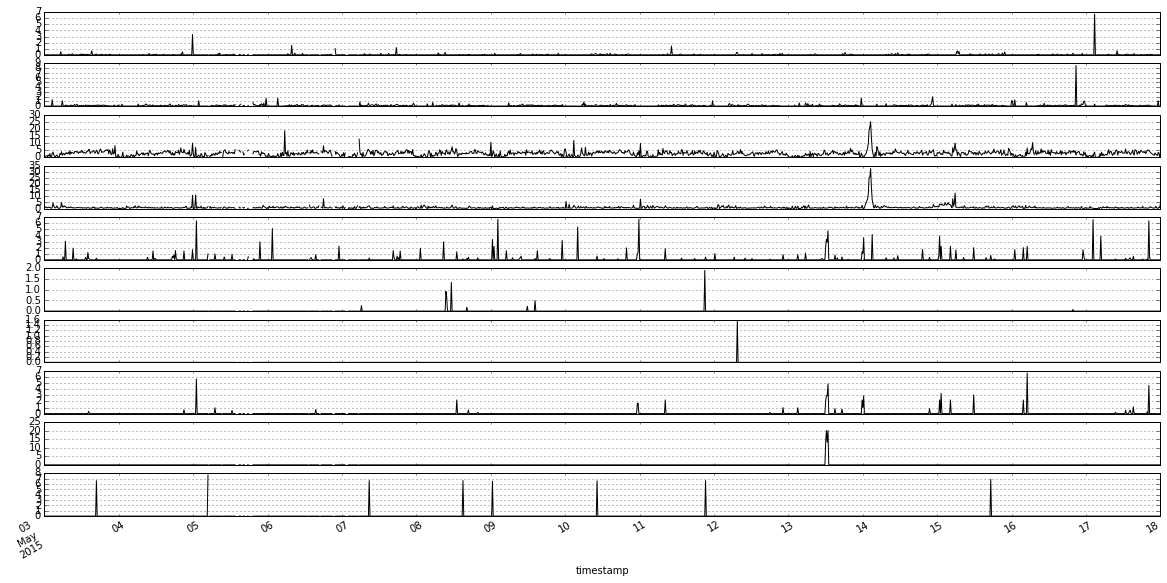

In [42]:
filt.iloc[:, 10:20].resample('15T').plot(subplots=True, legend=False)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa47ba01850>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7fa47b5b1ed0>], dtype=object)

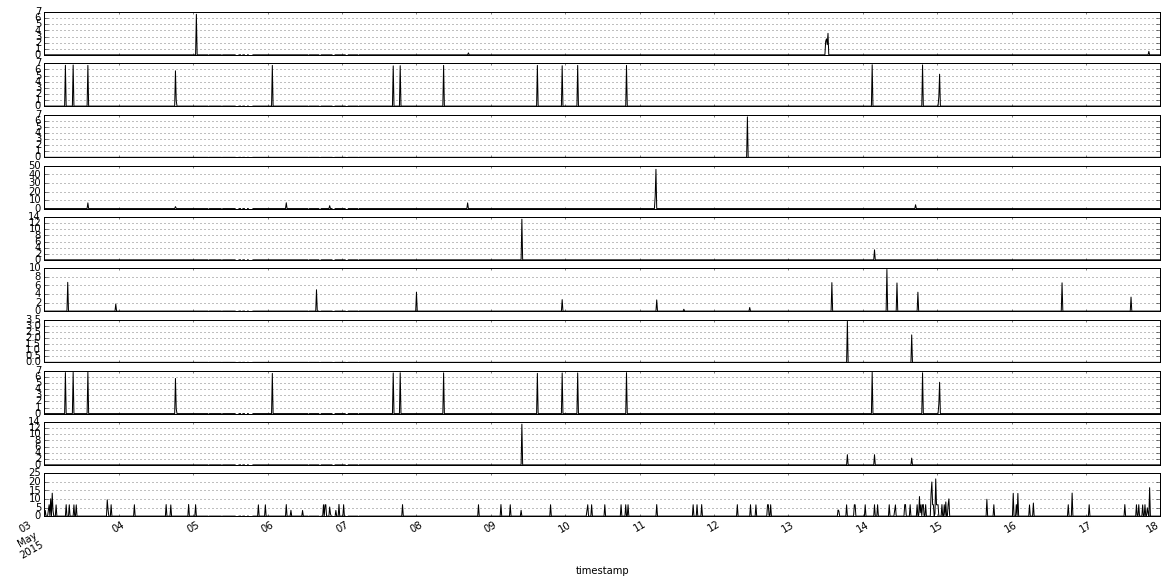

In [43]:
filt.iloc[:, 20:30].resample('15T').plot(subplots=True, legend=False)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa47b49b150>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7fa47ad78250>], dtype=object)

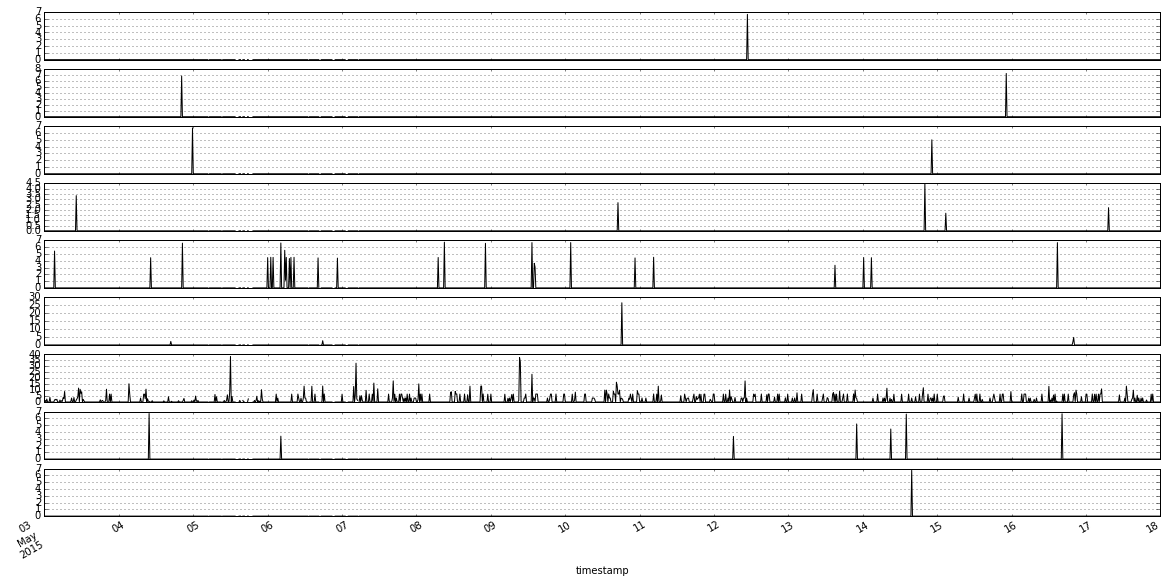

In [44]:
filt.iloc[:, 30:].resample('15T').plot(subplots=True, legend=False)

In [ ]:
def detect_anoms(series, training_period):
    """
    @param series: time-series
    @param training_period: timedelta
    """
    mean pd.rolling_mean(series, training_period)
    pd.rolling_std(series, training_period)
    
    
    

In [48]:
data = filt.iloc[:, 12]
data

timestamp
2015-05-03 00:00:00+00:00    0.000000
2015-05-03 00:01:00+00:00    0.000000
2015-05-03 00:02:00+00:00    0.000000
2015-05-03 00:03:00+00:00    0.546448
2015-05-03 00:04:00+00:00    0.790960
2015-05-03 00:05:00+00:00    0.000000
2015-05-03 00:06:00+00:00    0.712251
2015-05-03 00:07:00+00:00    0.985079
2015-05-03 00:08:00+00:00    0.000000
2015-05-03 00:09:00+00:00    0.000000
2015-05-03 00:10:00+00:00    0.000000
2015-05-03 00:11:00+00:00    0.000000
2015-05-03 00:12:00+00:00    0.583876
2015-05-03 00:13:00+00:00    1.394739
2015-05-03 00:14:00+00:00    0.819672
...
2015-05-17 23:46:00+00:00    0.000000
2015-05-17 23:47:00+00:00    0.000000
2015-05-17 23:48:00+00:00    0.000000
2015-05-17 23:49:00+00:00    0.000000
2015-05-17 23:50:00+00:00    0.000000
2015-05-17 23:51:00+00:00    0.000000
2015-05-17 23:52:00+00:00    1.009390
2015-05-17 23:53:00+00:00    0.415608
2015-05-17 23:54:00+00:00    1.395812
2015-05-17 23:55:00+00:00    2.867383
2015-05-17 23:56:00+00:00    0.91397

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa479b056d0>], dtype=object)

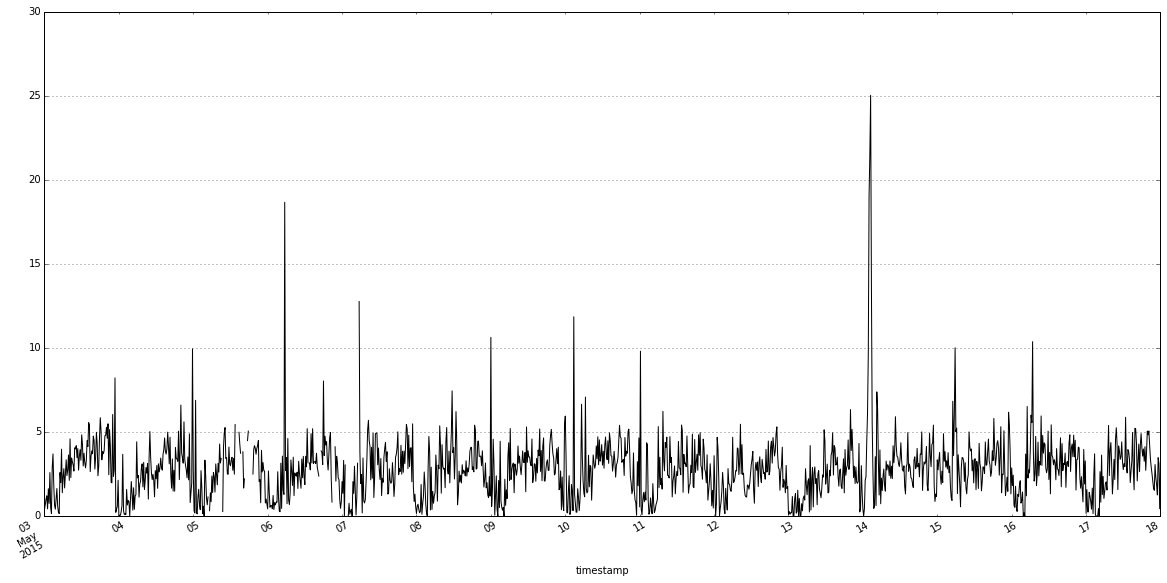

In [49]:
data.resample('15T').plot(subplots=True, legend=False)

In [53]:
%matplotlib qt

In [97]:
def evaluate_detector(series, detector):
    anoms = detector(series)
    series.plot()
    plt.figure()
    anoms.plot()

In [95]:
def alllanoms(data):
    anoms = data.copy()
    anoms[:] = 1
    return anoms

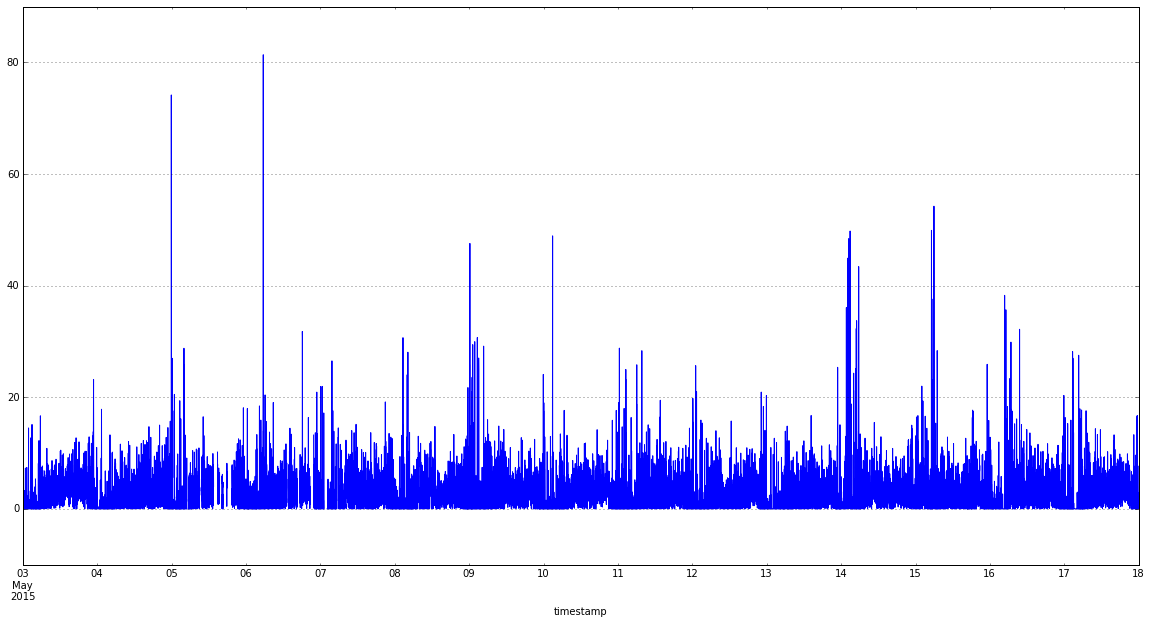

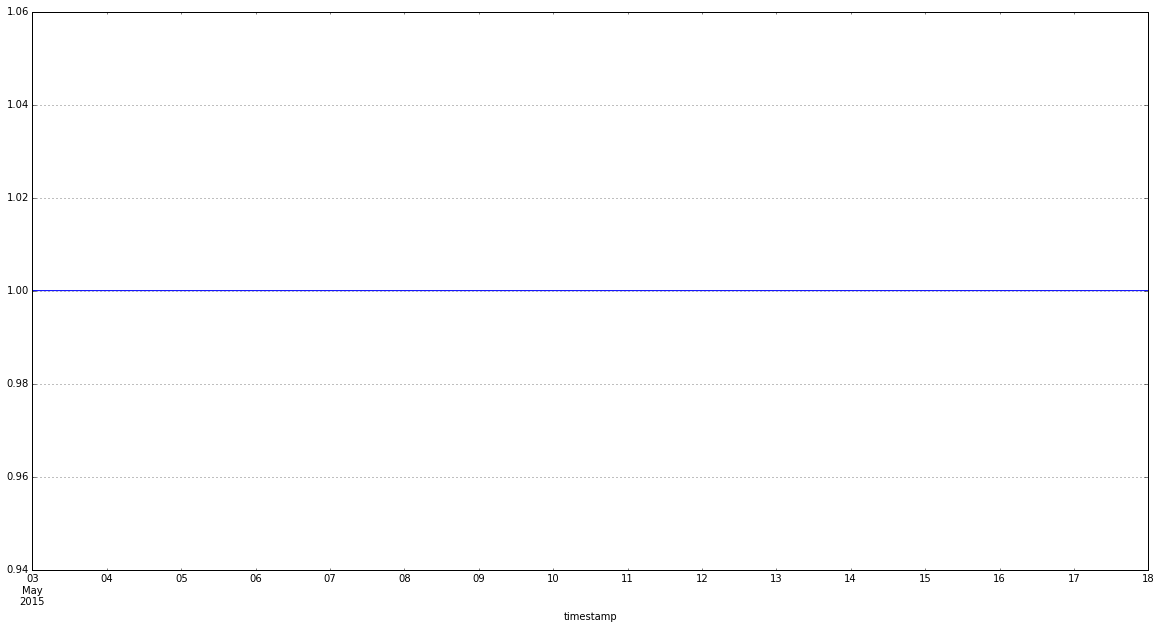

In [98]:
evaluate_detector(data, alllanoms)

In [68]:
plt.plot(threesigma(1000, data))

In [119]:
%matplotlib qt

In [122]:
def eval_three_sigma(series):
    window = 100
    mean = pd.rolling_mean(series, window, min_periods=1)
    std = pd.rolling_std(series, window, min_periods=1)
    plt.plot(data.index, data, 'k')
# plt.show()
    plt.plot(mean.index, mean, 'b')
    plt.fill_between(std.index, mean-3*std, mean+3*std, color='b', alpha=0.2)

In [127]:
eval_three_sigma(filt.iloc[:,0])

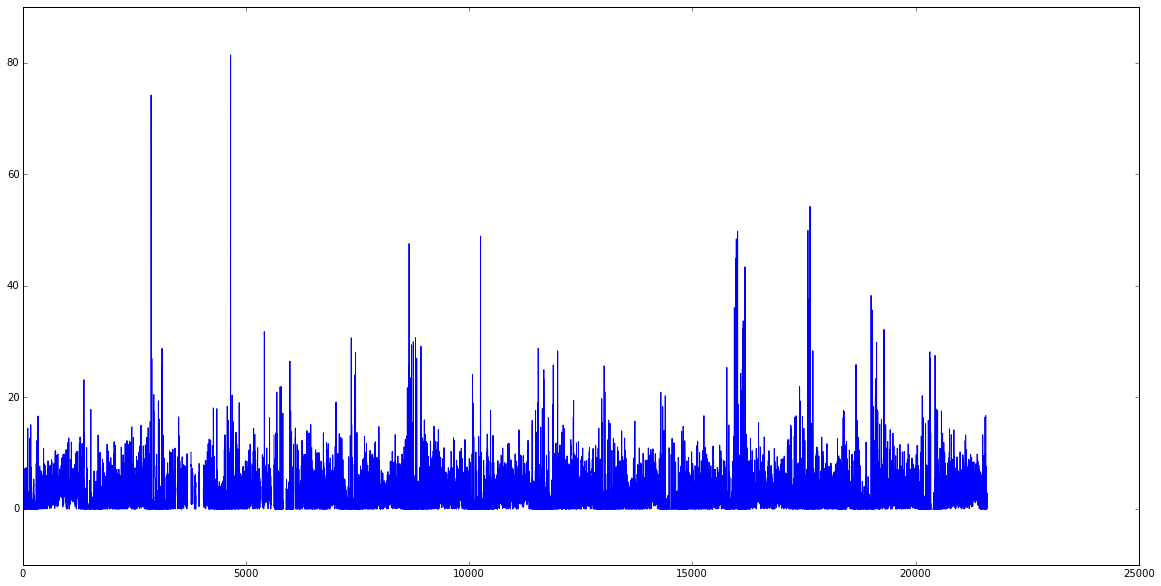

In [79]:
plt.plot(series)

In [294]:
x = np.arange(9.).reshape(3, 3)

In [297]:
x > 4

array([[False, False, False],
       [False, False,  True],
       [ True,  True,  True]], dtype=bool)

In [298]:
np.choose

array([['b', 'b', 'b'],
       ['b', 'b', 'a'],
       ['a', 'a', 'a']], 
      dtype='|S1')

In [339]:
%matplotlib qt

In [341]:
tmp = vrt_error_request_data
tmp = tmp[tmp.index > "2015-04-06"]
tmp = tmp[tmp.index < "2015-04-06 12:00"]
show_errors_requests(vrt_meta, tmp, 264, 634)

In [274]:
locals().keys()

['selection',
 '_233',
 'datetime',
 '_i193',
 'create_training_set',
 '_97',
 '_96',
 '_95',
 '_93',
 '_91',
 '_90',
 '_208',
 'compose',
 '_i148',
 'extract_selection',
 '_i144',
 '_i145',
 '_i146',
 '_i147',
 '_i140',
 '_i141',
 '_i142',
 'Histogram',
 '_62',
 '_60',
 '_66',
 '_64',
 'filled_ratio',
 '_267',
 '_261',
 'AggregatorType',
 '_263',
 'training_set',
 'mpl',
 '_269',
 '_268',
 '_i191',
 '_i238',
 '_i239',
 '_i236',
 '_i237',
 '_i234',
 '_i235',
 '_i232',
 '_i233',
 '_i230',
 '_i231',
 '_232',
 '_100',
 '_101',
 '_103',
 '_104',
 '_105',
 'lingala_path',
 '_107',
 '_i13',
 '_i12',
 '_i11',
 '_i10',
 '_i17',
 '_i16',
 '_i15',
 '_i14',
 '_271',
 'x',
 '_i19',
 '_i18',
 '_i228',
 '_193',
 '_i214',
 '_190',
 '_197',
 '_195',
 '_i215',
 '_98',
 '_i216',
 '_i174',
 '_i225',
 '_200',
 'vrt_meta',
 'result',
 '_252',
 '_i224',
 '_207',
 '_i227',
 '_206',
 '_i128',
 '_i129',
 '_205',
 '_i122',
 '_i123',
 '_i120',
 '_i121',
 '_i126',
 '_i127',
 '_i124',
 '_i125',
 '_i197',
 'state',

In [188]:
import math

In [189]:
3**7 * math.factorial(7)



11022480

In [6]:
pd.Series([np.nan, np.nan]).mean() > 2.0

False